<a href="https://colab.research.google.com/github/tntnu/default/blob/main/%5B%EA%B0%9C%EC%9D%B8%ED%94%84%EB%A1%9C%EC%A0%9D%ED%8A%B8%EC%97%B0%EC%8A%B5%5D_%EC%B1%84%EB%AC%B4%EB%B6%88%EC%9D%B4%ED%96%89%EC%97%AC%EB%B6%80%EC%98%88%EC%B8%A1_2%EC%B0%A8.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# ÌïúÍ∏Ä Ìè∞Ìä∏ ÏÑ§Ïπò
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
fonts-nanum is already the newest version (20200506-1).
0 upgraded, 0 newly installed, 0 to remove and 29 not upgraded.
/usr/share/fonts: caching, new cache contents: 0 fonts, 1 dirs
/usr/share/fonts/truetype: caching, new cache contents: 0 fonts, 3 dirs
/usr/share/fonts/truetype/humor-sans: caching, new cache contents: 1 fonts, 0 dirs
/usr/share/fonts/truetype/liberation: caching, new cache contents: 16 fonts, 0 dirs
/usr/share/fonts/truetype/nanum: caching, new cache contents: 12 fonts, 0 dirs
/usr/local/share/fonts: caching, new cache contents: 0 fonts, 0 dirs
/root/.local/share/fonts: skipping, no such directory
/root/.fonts: skipping, no such directory
/usr/share/fonts/truetype: skipping, looped directory detected
/usr/share/fonts/truetype/humor-sans: skipping, looped directory detected
/usr/share/fonts/truetype/liberation: skipping, looped directory detected
/usr/share/fonts/truetype/

In [2]:
from google.colab import files
uploaded_file = files.upload()

Saving train.csv to train.csv


In [3]:
from google.colab import files
uploaded_file = files.upload()

Saving test.csv to test.csv


***üî• Ï∂îÏ≤úÌïòÎäî Feature Engineering ÏàúÏÑú***  
1Ô∏è‚É£ Í≤∞Ï∏°Ïπò Ï≤òÎ¶¨ ‚Üí NaN Í∞í ÎåÄÏ≤¥ (fillna() ÌôúÏö©)  
2Ô∏è‚É£ Ïù¥ÏÉÅÏπò ÌÉêÏÉâ Î∞è Ï≤òÎ¶¨ ‚Üí IQR ÎòêÎäî Winsorizing ÌôúÏö©  
3Ô∏è‚É£ Î°úÍ∑∏ Î≥ÄÌôò(ÌïÑÏöî Ïãú) ‚Üí Ïù¥ÏÉÅÏπòÎ•º Ï≤òÎ¶¨Ìïú ÌõÑ Ï†ÅÏö©  
4Ô∏è‚É£ Î≤îÏ£ºÌòï Î≥ÄÏàò Î≥ÄÌôò ‚Üí One-Hot Encoding ÎòêÎäî Label Encoding  
5Ô∏è‚É£ Î≥ÄÏàò Ï†úÍ±∞ (Feature Selection) ‚Üí Îã§Ï§ëÍ≥µÏÑ†ÏÑ± Ï†úÍ±∞, Ï§ëÏöî Î≥ÄÏàòÎßå Ïú†ÏßÄ



# ***1. Exploratory data analysis***

## ***1.1 Îç∞Ïù¥ÌÑ∞ ÌÉêÏÉâ***

In [164]:
import pandas as pd

train = pd.read_csv("train.csv")
test = pd.read_csv("test.csv")

In [68]:
train.head()

UID Ï£ºÍ±∞ ÌòïÌÉú      Ïó∞Í∞Ñ ÏÜåÎìù ÌòÑÏû¨ ÏßÅÏû• Í∑ºÏÜç Ïó∞Ïàò  Ï≤¥ÎÇ© ÏÑ∏Í∏à ÏïïÎ•ò ÌöüÏàò  Í∞úÏÑ§Îêú Ïã†Ïö©Í≥ÑÏ¢å Ïàò  \
0  TRAIN_00000    ÏûêÍ∞Ä  1941337.5      10ÎÖÑ Ïù¥ÏÉÅ          0.0           9   
1  TRAIN_00001    ÏõîÏÑ∏  1979505.0      10ÎÖÑ Ïù¥ÏÉÅ          0.0           5   
2  TRAIN_00002    ÏõîÏÑ∏  1356381.0          4ÎÖÑ          0.0          12   
3  TRAIN_00003    ÏõîÏÑ∏  1049017.5          6ÎÖÑ          0.0          15   
4  TRAIN_00004    ÏõîÏÑ∏  4320217.5          2ÎÖÑ          0.0          11   

   Ïã†Ïö© Í±∞Îûò Ïó∞Ïàò   ÏµúÎåÄ Ïã†Ïö©ÌïúÎèÑ  Ïã†Ïö© Î¨∏Ï†ú Î∞úÏÉù ÌöüÏàò  ÎßàÏßÄÎßâ Ïó∞Ï≤¥ Ïù¥ÌõÑ Í≤ΩÍ≥º Í∞úÏõî Ïàò  Í∞úÏù∏ ÌååÏÇ∞ ÌöüÏàò  ÎåÄÏ∂ú Î™©Ï†Å  \
0      13.4  400597.5            0                 24         1  Î∂ÄÏ±Ñ ÌÜµÌï©   
1      15.1  360679.5            0                 11         0  Î∂ÄÏ±Ñ ÌÜµÌï©   
2      18.8  491770.5            1                 74         3  Î∂ÄÏ±Ñ ÌÜµÌï©   
3      14.8  411546.0            1                 22         1  Î∂ÄÏ±Ñ ÌÜµÌï©   
4      26.1  895288.5            0                 32         0  Î∂ÄÏ±Ñ ÌÜµÌï©   

  ÎåÄÏ∂ú ÏÉÅÌôò Í∏∞Í∞Ñ   ÌòÑÏû¨ ÎåÄÏ∂ú ÏûîÏï°  ÌòÑÏû¨ ÎØ∏ÏÉÅÌôò Ïã†Ïö©Ïï°  Ïõî ÏÉÅÌôò Î∂ÄÏ±ÑÏï°  Ïã†Ïö© Ï†êÏàò  Ï±ÑÎ¨¥ Î∂àÏù¥Ìñâ Ïó¨Î∂Ä  
0    Îã®Í∏∞ ÏÉÅÌôò   390903.0    225457.5    8806.5    767          0  
1    Îã®Í∏∞ ÏÉÅÌôò  1002184.5     64749.0   24961.5    767          0  
2    Îã®Í∏∞ ÏÉÅÌôò   227775.0    487644.0   12069.0    800          1  
3    Îã®Í∏∞ ÏÉÅÌôò   251383.5    413211.0   31749.0    796          1  
4    Ïû•Í∏∞ ÏÉÅÌôò  1163176.5     78991.5    5862.0    751          0

In [69]:
train.columns

Index(['UID', 'Ï£ºÍ±∞ ÌòïÌÉú', 'Ïó∞Í∞Ñ ÏÜåÎìù', 'ÌòÑÏû¨ ÏßÅÏû• Í∑ºÏÜç Ïó∞Ïàò', 'Ï≤¥ÎÇ© ÏÑ∏Í∏à ÏïïÎ•ò ÌöüÏàò', 'Í∞úÏÑ§Îêú Ïã†Ïö©Í≥ÑÏ¢å Ïàò',
       'Ïã†Ïö© Í±∞Îûò Ïó∞Ïàò', 'ÏµúÎåÄ Ïã†Ïö©ÌïúÎèÑ', 'Ïã†Ïö© Î¨∏Ï†ú Î∞úÏÉù ÌöüÏàò', 'ÎßàÏßÄÎßâ Ïó∞Ï≤¥ Ïù¥ÌõÑ Í≤ΩÍ≥º Í∞úÏõî Ïàò', 'Í∞úÏù∏ ÌååÏÇ∞ ÌöüÏàò',
       'ÎåÄÏ∂ú Î™©Ï†Å', 'ÎåÄÏ∂ú ÏÉÅÌôò Í∏∞Í∞Ñ', 'ÌòÑÏû¨ ÎåÄÏ∂ú ÏûîÏï°', 'ÌòÑÏû¨ ÎØ∏ÏÉÅÌôò Ïã†Ïö©Ïï°', 'Ïõî ÏÉÅÌôò Î∂ÄÏ±ÑÏï°', 'Ïã†Ïö© Ï†êÏàò',
       'Ï±ÑÎ¨¥ Î∂àÏù¥Ìñâ Ïó¨Î∂Ä'],
      dtype='object')

In [70]:
train.shape

(10000, 18)

In [71]:
test.shape

(2062, 17)

In [72]:
train.isnull().sum()
# Í≤∞Ï∏°ÏπòÍ∞Ä ÏóÜÎäî ÏïÑÏ£º ÍπîÎÅîÌïú Îç∞Ïù¥ÌÑ∞

UID                  0
Ï£ºÍ±∞ ÌòïÌÉú                0
Ïó∞Í∞Ñ ÏÜåÎìù                0
ÌòÑÏû¨ ÏßÅÏû• Í∑ºÏÜç Ïó∞Ïàò          0
Ï≤¥ÎÇ© ÏÑ∏Í∏à ÏïïÎ•ò ÌöüÏàò          0
Í∞úÏÑ§Îêú Ïã†Ïö©Í≥ÑÏ¢å Ïàò           0
Ïã†Ïö© Í±∞Îûò Ïó∞Ïàò             0
ÏµúÎåÄ Ïã†Ïö©ÌïúÎèÑ              0
Ïã†Ïö© Î¨∏Ï†ú Î∞úÏÉù ÌöüÏàò          0
ÎßàÏßÄÎßâ Ïó∞Ï≤¥ Ïù¥ÌõÑ Í≤ΩÍ≥º Í∞úÏõî Ïàò    0
Í∞úÏù∏ ÌååÏÇ∞ ÌöüÏàò             0
ÎåÄÏ∂ú Î™©Ï†Å                0
ÎåÄÏ∂ú ÏÉÅÌôò Í∏∞Í∞Ñ             0
ÌòÑÏû¨ ÎåÄÏ∂ú ÏûîÏï°             0
ÌòÑÏû¨ ÎØ∏ÏÉÅÌôò Ïã†Ïö©Ïï°           0
Ïõî ÏÉÅÌôò Î∂ÄÏ±ÑÏï°             0
Ïã†Ïö© Ï†êÏàò                0
Ï±ÑÎ¨¥ Î∂àÏù¥Ìñâ Ïó¨Î∂Ä            0
dtype: int64

In [73]:
test.isnull().sum()

UID                  0
Ï£ºÍ±∞ ÌòïÌÉú                0
Ïó∞Í∞Ñ ÏÜåÎìù                0
ÌòÑÏû¨ ÏßÅÏû• Í∑ºÏÜç Ïó∞Ïàò          0
Ï≤¥ÎÇ© ÏÑ∏Í∏à ÏïïÎ•ò ÌöüÏàò          0
Í∞úÏÑ§Îêú Ïã†Ïö©Í≥ÑÏ¢å Ïàò           0
Ïã†Ïö© Í±∞Îûò Ïó∞Ïàò             0
ÏµúÎåÄ Ïã†Ïö©ÌïúÎèÑ              0
Ïã†Ïö© Î¨∏Ï†ú Î∞úÏÉù ÌöüÏàò          0
ÎßàÏßÄÎßâ Ïó∞Ï≤¥ Ïù¥ÌõÑ Í≤ΩÍ≥º Í∞úÏõî Ïàò    0
Í∞úÏù∏ ÌååÏÇ∞ ÌöüÏàò             0
ÎåÄÏ∂ú Î™©Ï†Å                0
ÎåÄÏ∂ú ÏÉÅÌôò Í∏∞Í∞Ñ             0
ÌòÑÏû¨ ÎåÄÏ∂ú ÏûîÏï°             0
ÌòÑÏû¨ ÎØ∏ÏÉÅÌôò Ïã†Ïö©Ïï°           0
Ïõî ÏÉÅÌôò Î∂ÄÏ±ÑÏï°             0
Ïã†Ïö© Ï†êÏàò                0
dtype: int64

In [74]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 18 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   UID                10000 non-null  object 
 1   Ï£ºÍ±∞ ÌòïÌÉú              10000 non-null  object 
 2   Ïó∞Í∞Ñ ÏÜåÎìù              10000 non-null  float64
 3   ÌòÑÏû¨ ÏßÅÏû• Í∑ºÏÜç Ïó∞Ïàò        10000 non-null  object 
 4   Ï≤¥ÎÇ© ÏÑ∏Í∏à ÏïïÎ•ò ÌöüÏàò        10000 non-null  float64
 5   Í∞úÏÑ§Îêú Ïã†Ïö©Í≥ÑÏ¢å Ïàò         10000 non-null  int64  
 6   Ïã†Ïö© Í±∞Îûò Ïó∞Ïàò           10000 non-null  float64
 7   ÏµúÎåÄ Ïã†Ïö©ÌïúÎèÑ            10000 non-null  float64
 8   Ïã†Ïö© Î¨∏Ï†ú Î∞úÏÉù ÌöüÏàò        10000 non-null  int64  
 9   ÎßàÏßÄÎßâ Ïó∞Ï≤¥ Ïù¥ÌõÑ Í≤ΩÍ≥º Í∞úÏõî Ïàò  10000 non-null  int64  
 10  Í∞úÏù∏ ÌååÏÇ∞ ÌöüÏàò           10000 non-null  int64  
 11  ÎåÄÏ∂ú Î™©Ï†Å              10000 non-null  object 
 12  ÎåÄÏ∂ú ÏÉÅÌôò Í∏∞Í∞Ñ           10000 non-null  object 
 13  ÌòÑÏû¨ 

## ***1.2 Îç∞Ïù¥ÌÑ∞ ÏãúÍ∞ÅÌôî***

* Bar chart for categorical features

1. Ï£ºÍ±∞ ÌòïÌÉú
2. ÌòÑÏû¨ ÏßÅÏû• Í∑ºÏÜç Ïó∞Ïàò
3. ÎåÄÏ∂ú Î™©Ï†Å
4. ÎåÄÏ∂ú ÏÉÅÌôò Í∏∞Í∞Ñ
5. Ï≤¥ÎÇ© ÏÑ∏Í∏à ÏïïÎ•ò ÌöüÏàò





üìå Ïñ¥Îñ§ Î≥ÄÏàòÍ∞Ä Ï¢ÖÏÜç Î≥ÄÏàòÏóê ÏòÅÌñ•ÏùÑ ÎØ∏ÏπòÎäîÏßÄ ÌôïÏù∏ÌïòÎ†§Î©¥ "Í∑∏Î£π ÎÇ¥ ÎπÑÏú®"ÏùÑ Î¥êÏïº Ìï®

In [75]:
train[train['Ï±ÑÎ¨¥ Î∂àÏù¥Ìñâ Ïó¨Î∂Ä'] == 0]['Ï£ºÍ±∞ ÌòïÌÉú']

0                    ÏûêÍ∞Ä
1                    ÏõîÏÑ∏
4                    ÏõîÏÑ∏
7       Ï£ºÌÉù Îã¥Î≥¥ ÎåÄÏ∂ú (Í±∞Ï£º Ï§ë)
9                    ÏûêÍ∞Ä
             ...       
9995    Ï£ºÌÉù Îã¥Î≥¥ ÎåÄÏ∂ú (Í±∞Ï£º Ï§ë)
9996    Ï£ºÌÉù Îã¥Î≥¥ ÎåÄÏ∂ú (Í±∞Ï£º Ï§ë)
9997    Ï£ºÌÉù Îã¥Î≥¥ ÎåÄÏ∂ú (Í±∞Ï£º Ï§ë)
9998                 ÏûêÍ∞Ä
9999    Ï£ºÌÉù Îã¥Î≥¥ ÎåÄÏ∂ú (Í±∞Ï£º Ï§ë)
Name: Ï£ºÍ±∞ ÌòïÌÉú, Length: 6588, dtype: object

In [76]:
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set()
import warnings
warnings.filterwarnings(action='ignore')
plt.rc('font', family='NanumBarunGothic')

In [77]:
def bar_chart(feature) :
  default = train[train['Ï±ÑÎ¨¥ Î∂àÏù¥Ìñâ Ïó¨Î∂Ä'] == 1][feature].value_counts()
  non_default = train[train['Ï±ÑÎ¨¥ Î∂àÏù¥Ìñâ Ïó¨Î∂Ä'] == 0][feature].value_counts()
  df = pd.DataFrame([default, non_default])
  df.index = ['default', 'non_default']
  df.plot(kind = 'bar', stacked = True, figsize = (10, 5)) # stacked=True ‚Üí ÎàÑÏ†Å ÎßâÎåÄ Í∑∏ÎûòÌîÑ

In [78]:
train['Ï£ºÍ±∞ ÌòïÌÉú'].value_counts()

Ï£ºÍ±∞ ÌòïÌÉú
ÏõîÏÑ∏                  4050
Ï£ºÌÉù Îã¥Î≥¥ ÎåÄÏ∂ú (Í±∞Ï£º Ï§ë)     3633
ÏûêÍ∞Ä                  2241
Ï£ºÌÉù Îã¥Î≥¥ ÎåÄÏ∂ú (ÎπÑÍ±∞Ï£º Ï§ë)      76
Name: count, dtype: int64

In [79]:
default = train[train['Ï±ÑÎ¨¥ Î∂àÏù¥Ìñâ Ïó¨Î∂Ä'] == 1]['Ï£ºÍ±∞ ÌòïÌÉú'].value_counts()
default

Ï£ºÍ±∞ ÌòïÌÉú
ÏõîÏÑ∏                  1559
Ï£ºÌÉù Îã¥Î≥¥ ÎåÄÏ∂ú (Í±∞Ï£º Ï§ë)     1107
ÏûêÍ∞Ä                   734
Ï£ºÌÉù Îã¥Î≥¥ ÎåÄÏ∂ú (ÎπÑÍ±∞Ï£º Ï§ë)      12
Name: count, dtype: int64

In [80]:
non_default = train[train['Ï±ÑÎ¨¥ Î∂àÏù¥Ìñâ Ïó¨Î∂Ä'] == 0]['Ï£ºÍ±∞ ÌòïÌÉú'].value_counts()
non_default

Ï£ºÍ±∞ ÌòïÌÉú
Ï£ºÌÉù Îã¥Î≥¥ ÎåÄÏ∂ú (Í±∞Ï£º Ï§ë)     2526
ÏõîÏÑ∏                  2491
ÏûêÍ∞Ä                  1507
Ï£ºÌÉù Îã¥Î≥¥ ÎåÄÏ∂ú (ÎπÑÍ±∞Ï£º Ï§ë)      64
Name: count, dtype: int64

In [81]:
df = pd.DataFrame([default, non_default])
df

Ï£ºÍ±∞ ÌòïÌÉú    ÏõîÏÑ∏  Ï£ºÌÉù Îã¥Î≥¥ ÎåÄÏ∂ú (Í±∞Ï£º Ï§ë)    ÏûêÍ∞Ä  Ï£ºÌÉù Îã¥Î≥¥ ÎåÄÏ∂ú (ÎπÑÍ±∞Ï£º Ï§ë)
count  1559             1107   734                12
count  2491             2526  1507                64

### ***1.2.1 Ï£ºÍ±∞ÌòïÌÉú***

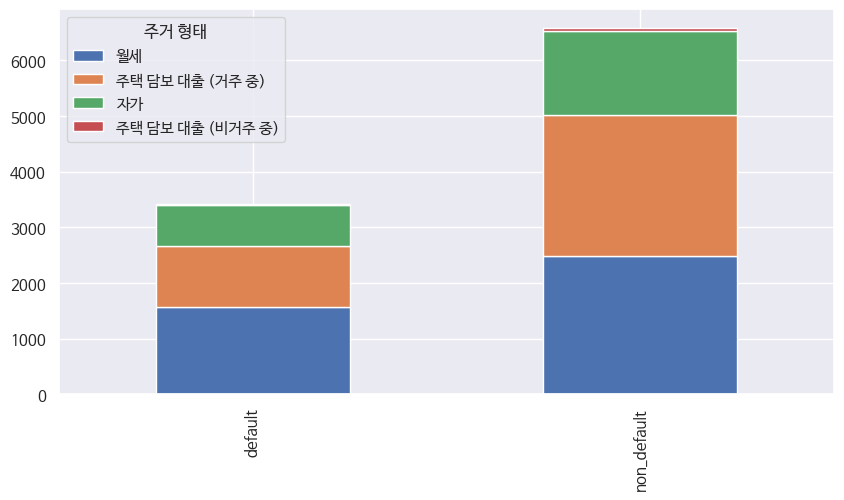

In [82]:
bar_chart('Ï£ºÍ±∞ ÌòïÌÉú')

In [83]:
train.groupby('Ï±ÑÎ¨¥ Î∂àÏù¥Ìñâ Ïó¨Î∂Ä')['Ï£ºÍ±∞ ÌòïÌÉú'].value_counts(normalize = True).unstack() *100 # unstack() Îç∞Ïù¥ÌÑ∞ Íµ¨Ï°∞ Ï∞®Ïù¥

# ÏõîÏÑ∏ Í±∞Ï£ºÏûêÎäî Ï±ÑÎ¨¥ Î∂àÏù¥Ìñâ ÎπÑÏú®Ïù¥ Îçî ÎÜíÏùå (+7.88%)
# ‚Üí ÏõîÏÑ∏ Í±∞Ï£ºÏûêÎäî ÎåÄÏ∂ú ÏÉÅÌôò Îä•Î†•Ïù¥ ÏÉÅÎåÄÏ†ÅÏúºÎ°ú ÎÇÆÏùÑ Í∞ÄÎä•ÏÑ±Ïù¥ ÏûàÏùå (ÏÜåÎìùÏù¥ Î∂àÏïàÏ†ïÌï† Í∞ÄÎä•ÏÑ±)
# -> ÏûêÍ∞Ä ÎπÑÏú®ÏùÄ ÎπÑÏä∑ÌïòÎØÄÎ°ú Ï±ÑÎ¨¥ Î∂àÏù¥ÌñâÏóê ÎØ∏ÏπòÎäî ÏòÅÌñ•Ïù¥ ÌÅ¨ÏßÄ ÏïäÏùå
# -> Ï£ºÌÉù Îã¥Î≥¥ ÎåÄÏ∂ú(Í±∞Ï£º Ï§ë)Ïùò Í≤ΩÏö∞ Î∂àÏù¥Ìñâ ÎπÑÏú®Ïù¥ ÎÇÆÏúºÎØÄÎ°ú Í≤ΩÏ†úÏ†ÅÏúºÎ°ú Îçî ÏïàÏ†ïÏ†ÅÏù∏ Í≤ΩÏö∞Í∞Ä ÎßéÏùÑ Í∞ÄÎä•ÏÑ± ÏûàÏùå
# -> Ï£ºÌÉù Îã¥Î≥¥ ÎåÄÏ∂ú(ÎπÑÍ±∞Ï£º Ï§ë)Ïùò Í≤ΩÏö∞ Î∂àÏù¥Ìñâ ÎπÑÏú®Ïù¥ ÎÇÆÏúºÎØÄÎ°ú Í≤ΩÏ†úÏ†ÅÏúºÎ°ú Îçî ÏïàÏ†ïÏ†ÅÏù∏ Í≤ΩÏö∞Í∞Ä ÎßéÏùÑ Í∞ÄÎä•ÏÑ± ÏûàÏùå
# üìå ÏõîÏÑ∏Îßå Ïú†ÎèÖ Î∂àÏù¥Ìñâ ÎπÑÏú®Ïù¥ ÎÜíÏïÑÏÑú "Ï£ºÍ±∞ ÌòïÌÉú"Í∞Ä Î∂àÏù¥ÌñâÏùÑ ÏòàÏ∏°ÌïòÎäî Îç∞ ÏòÅÌñ•ÏùÑ Ï§Ñ ÏàòÎèÑ ÏûàÏùå(Ïã§Ï†úÎ°úÎäî ÏïÑÎãêÏàòÎèÑ ÏûàÏùå, Í¥ÄÍ≥ÑÎ•º ÌÉêÏÉâÌïòÎäîÎç∞ Ïú†Ïö©)

Ï£ºÍ±∞ ÌòïÌÉú             ÏõîÏÑ∏         ÏûêÍ∞Ä  Ï£ºÌÉù Îã¥Î≥¥ ÎåÄÏ∂ú (Í±∞Ï£º Ï§ë)  Ï£ºÌÉù Îã¥Î≥¥ ÎåÄÏ∂ú (ÎπÑÍ±∞Ï£º Ï§ë)
Ï±ÑÎ¨¥ Î∂àÏù¥Ìñâ Ïó¨Î∂Ä                                                         
0          37.811172  22.874924        38.342441          0.971463
1          45.691676  21.512309        32.444314          0.351700

In [84]:
train.groupby('Ï±ÑÎ¨¥ Î∂àÏù¥Ìñâ Ïó¨Î∂Ä')['Ï£ºÍ±∞ ÌòïÌÉú'].value_counts(normalize = True) * 100

Ï±ÑÎ¨¥ Î∂àÏù¥Ìñâ Ïó¨Î∂Ä  Ï£ºÍ±∞ ÌòïÌÉú           
0          Ï£ºÌÉù Îã¥Î≥¥ ÎåÄÏ∂ú (Í±∞Ï£º Ï§ë)     38.342441
           ÏõîÏÑ∏                  37.811172
           ÏûêÍ∞Ä                  22.874924
           Ï£ºÌÉù Îã¥Î≥¥ ÎåÄÏ∂ú (ÎπÑÍ±∞Ï£º Ï§ë)     0.971463
1          ÏõîÏÑ∏                  45.691676
           Ï£ºÌÉù Îã¥Î≥¥ ÎåÄÏ∂ú (Í±∞Ï£º Ï§ë)     32.444314
           ÏûêÍ∞Ä                  21.512309
           Ï£ºÌÉù Îã¥Î≥¥ ÎåÄÏ∂ú (ÎπÑÍ±∞Ï£º Ï§ë)     0.351700
Name: proportion, dtype: float64

### ***1.2.2 ÌòÑÏû¨ ÏßÅÏû• Í∑ºÏÜç Ïó∞Ïàò***


In [85]:
train['ÌòÑÏû¨ ÏßÅÏû• Í∑ºÏÜç Ïó∞Ïàò'].value_counts().sort_index()

ÌòÑÏû¨ ÏßÅÏû• Í∑ºÏÜç Ïó∞Ïàò
10ÎÖÑ Ïù¥ÏÉÅ    3828
1ÎÖÑ         581
1ÎÖÑ ÎØ∏Îßå      488
2ÎÖÑ        1225
3ÎÖÑ         523
4ÎÖÑ         541
5ÎÖÑ         729
6ÎÖÑ         357
7ÎÖÑ         619
8ÎÖÑ         841
9ÎÖÑ         268
Name: count, dtype: int64

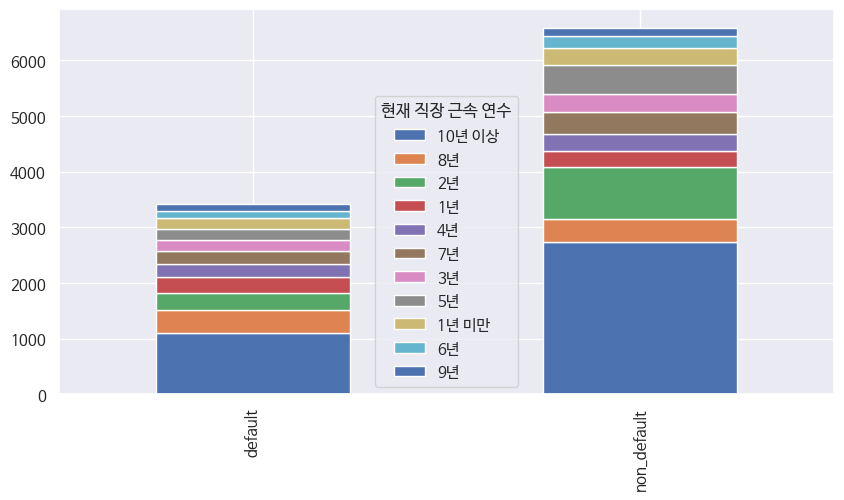

In [86]:
bar_chart('ÌòÑÏû¨ ÏßÅÏû• Í∑ºÏÜç Ïó∞Ïàò')

In [87]:
train.groupby('Ï±ÑÎ¨¥ Î∂àÏù¥Ìñâ Ïó¨Î∂Ä')['ÌòÑÏû¨ ÏßÅÏû• Í∑ºÏÜç Ïó∞Ïàò'].value_counts(normalize = True).unstack() * 100

ÌòÑÏû¨ ÏßÅÏû• Í∑ºÏÜç Ïó∞Ïàò     10ÎÖÑ Ïù¥ÏÉÅ        1ÎÖÑ     1ÎÖÑ ÎØ∏Îßå         2ÎÖÑ        3ÎÖÑ        4ÎÖÑ  \
Ï±ÑÎ¨¥ Î∂àÏù¥Ìñâ Ïó¨Î∂Ä                                                                   
0            41.438980  4.523376  4.584092  13.995143  4.781421  4.584092   
1            32.180539  8.294256  5.451348   8.880422  6.096131  7.004689   

ÌòÑÏû¨ ÏßÅÏû• Í∑ºÏÜç Ïó∞Ïàò        5ÎÖÑ        6ÎÖÑ        7ÎÖÑ         8ÎÖÑ        9ÎÖÑ  
Ï±ÑÎ¨¥ Î∂àÏù¥Ìñâ Ïó¨Î∂Ä                                                       
0            8.029751  3.309047  5.950213   6.466302  2.337583  
1            5.861665  4.073857  6.652989  12.162954  3.341149

### ***1.2.3 ÎåÄÏ∂ú Î™©Ï†Å***

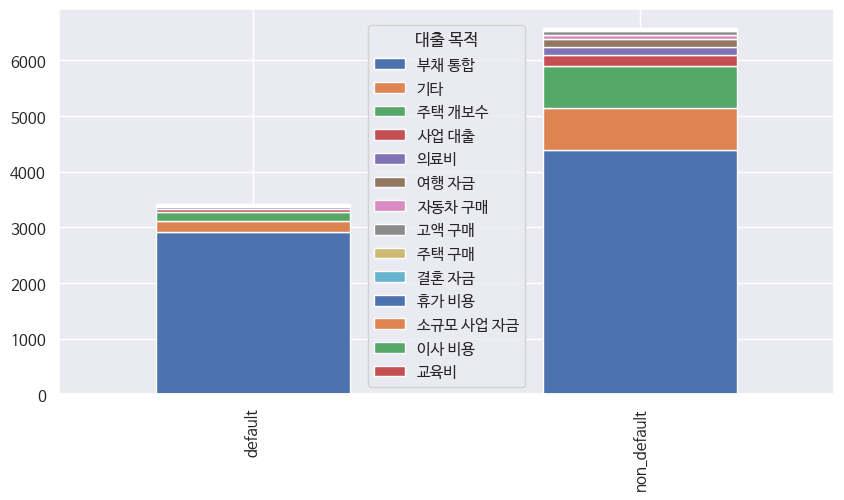

In [88]:
bar_chart('ÎåÄÏ∂ú Î™©Ï†Å')

In [89]:
train.groupby('Ï±ÑÎ¨¥ Î∂àÏù¥Ìñâ Ïó¨Î∂Ä')['ÎåÄÏ∂ú Î™©Ï†Å'].value_counts(normalize = True).unstack() * 100

# Î∂ÄÏ±Ñ ÌÜµÌï©Ïùò Í≤ΩÏö∞ Î∂àÏù¥Ìñâ ÎπÑÏú®Ïù¥ Îß§Ïö∞ ÎÜíÏùå

ÎåÄÏ∂ú Î™©Ï†Å         Í≤∞Ìòº ÏûêÍ∏à     Í≥†Ïï° Íµ¨Îß§       ÍµêÏú°ÎπÑ         Í∏∞ÌÉÄ      Î∂ÄÏ±Ñ ÌÜµÌï©     ÏÇ¨ÏóÖ ÎåÄÏ∂ú  \
Ï±ÑÎ¨¥ Î∂àÏù¥Ìñâ Ïó¨Î∂Ä                                                                 
0          0.182149  0.910747  0.045537  11.520947  66.590771  3.142077   
1          0.058617  0.234467       NaN   6.184056  85.199297  1.377491   

ÎåÄÏ∂ú Î™©Ï†Å      ÏÜåÍ∑úÎ™® ÏÇ¨ÏóÖ ÏûêÍ∏à     Ïó¨Ìñâ ÏûêÍ∏à       ÏùòÎ£åÎπÑ     Ïù¥ÏÇ¨ ÎπÑÏö©    ÏûêÎèôÏ∞® Íµ¨Îß§     Ï£ºÌÉù Í∞úÎ≥¥Ïàò  \
Ï±ÑÎ¨¥ Î∂àÏù¥Ìñâ Ïó¨Î∂Ä                                                                 
0           0.394657  2.200971  1.927747  0.060716  1.244687  11.384335   
1                NaN  0.820633  0.908558       NaN  0.381008   4.660023   

ÎåÄÏ∂ú Î™©Ï†Å         Ï£ºÌÉù Íµ¨Îß§     Ìú¥Í∞Ä ÎπÑÏö©  
Ï±ÑÎ¨¥ Î∂àÏù¥Ìñâ Ïó¨Î∂Ä                      
0          0.333940  0.060716  
1          0.117233  0.058617

In [90]:
train['ÎåÄÏ∂ú Î™©Ï†Å'].value_counts()

ÎåÄÏ∂ú Î™©Ï†Å
Î∂ÄÏ±Ñ ÌÜµÌï©        7294
Í∏∞ÌÉÄ            970
Ï£ºÌÉù Í∞úÎ≥¥Ïàò        909
ÏÇ¨ÏóÖ ÎåÄÏ∂ú         254
Ïó¨Ìñâ ÏûêÍ∏à         173
ÏùòÎ£åÎπÑ           158
ÏûêÎèôÏ∞® Íµ¨Îß§         95
Í≥†Ïï° Íµ¨Îß§          68
ÏÜåÍ∑úÎ™® ÏÇ¨ÏóÖ ÏûêÍ∏à      26
Ï£ºÌÉù Íµ¨Îß§          26
Í≤∞Ìòº ÏûêÍ∏à          14
Ìú¥Í∞Ä ÎπÑÏö©           6
Ïù¥ÏÇ¨ ÎπÑÏö©           4
ÍµêÏú°ÎπÑ             3
Name: count, dtype: int64

### ***1.2.4 ÎåÄÏ∂ú ÏÉÅÌôò Í∏∞Í∞Ñ***

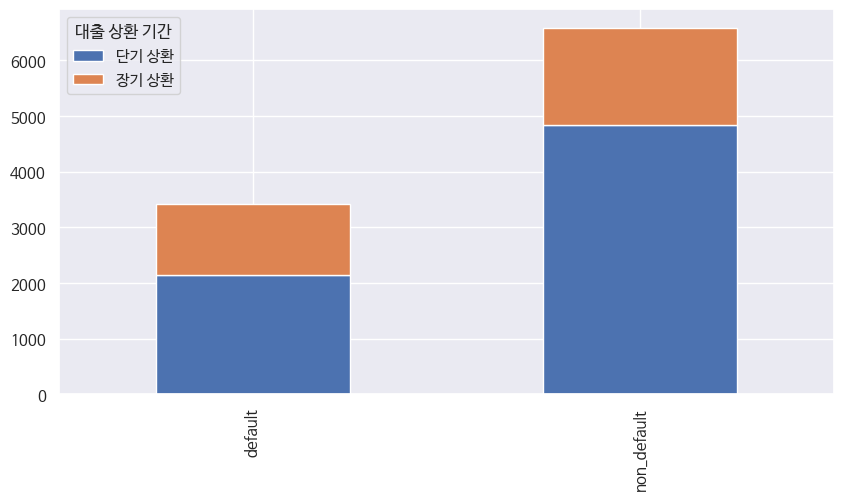

In [91]:
bar_chart('ÎåÄÏ∂ú ÏÉÅÌôò Í∏∞Í∞Ñ')

In [92]:
train.groupby('Ï±ÑÎ¨¥ Î∂àÏù¥Ìñâ Ïó¨Î∂Ä')['ÎåÄÏ∂ú ÏÉÅÌôò Í∏∞Í∞Ñ'].value_counts(normalize = True).unstack() * 100
# Ïû•Í∏∞ ÏÉÅÌôòÏùò Í≤ΩÏö∞ Ï±ÑÎ¨¥ Î∂àÏù¥ÌñâÌï† Í∞ÄÎä•ÏÑ± ÏûàÏùå

ÎåÄÏ∂ú ÏÉÅÌôò Í∏∞Í∞Ñ       Îã®Í∏∞ ÏÉÅÌôò      Ïû•Í∏∞ ÏÉÅÌôò
Ï±ÑÎ¨¥ Î∂àÏù¥Ìñâ Ïó¨Î∂Ä                      
0          73.497268  26.502732
1          62.514654  37.485346

### ***1.2.5 Ïó∞Í∞Ñ ÏÜåÎìù***

üìå ***ÌïòÎÇòÏùò Í∑∏ÎûòÌîÑÏóêÏÑú Ïó¨Îü¨ Îç∞Ïù¥ÌÑ∞Î•º ÎπÑÍµê ‚ûù kdeplot()***  
üìå ***Ïã§Ï†ú Îç∞Ïù¥ÌÑ∞ Í∞úÏàòÏôÄ Î∂ÑÌè¨Î•º ÎπÑÍµê -> histplot()***  
üìå ***Îç∞Ïù¥ÌÑ∞Í∞Ä Î∞ÄÏßëÌïú Í≥≥ÏùºÏàòÎ°ù KDE Í∞íÏù¥ ÎÜíÏïÑÏßê***

In [93]:
default = train[train['Ï±ÑÎ¨¥ Î∂àÏù¥Ìñâ Ïó¨Î∂Ä'] == 1]
non_default = train[train['Ï±ÑÎ¨¥ Î∂àÏù¥Ìñâ Ïó¨Î∂Ä'] == 0]

In [94]:
train['Ï±ÑÎ¨¥ Î∂àÏù¥Ìñâ Ïó¨Î∂Ä'].value_counts()

Ï±ÑÎ¨¥ Î∂àÏù¥Ìñâ Ïó¨Î∂Ä
0    6588
1    3412
Name: count, dtype: int64

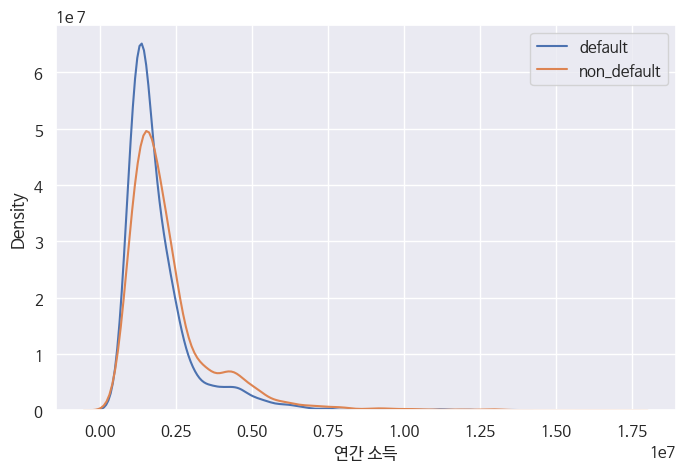

In [95]:
plt.figure(figsize=(8, 5))
sns.kdeplot(default['Ïó∞Í∞Ñ ÏÜåÎìù'], label='default')
sns.kdeplot(non_default['Ïó∞Í∞Ñ ÏÜåÎìù'], label='non_default')
plt.legend()

# ÎÇÆÏùÄ Ïó∞Í∞Ñ ÏÜåÎìùÏù∏ Í≤ΩÏö∞ Ï±ÑÎ¨¥ Î∂àÏù¥Ìñâ Î∞ÄÎèÑÍ∞Ä ÎÜíÏúºÎØÄÎ°ú ÏÉÅÎåÄÏ†ÅÏúºÎ°ú Ï±ÑÎ¨¥ Î∂àÏù¥ÌñâÏùº Í≤ΩÏö∞Í∞Ä ÎÜíÏùå

### ***1.2.6 Ï≤¥ÎÇ© ÏÑ∏Í∏à ÏïïÎ•ò ÌöüÏàò***

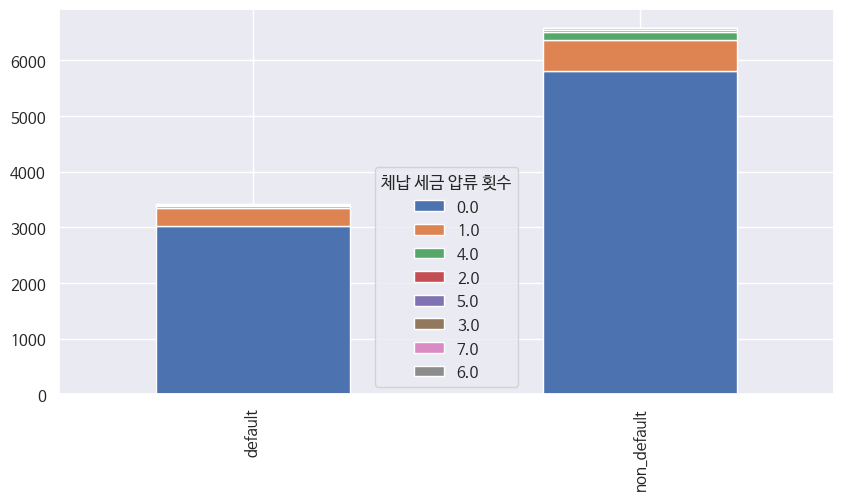

In [96]:
bar_chart("Ï≤¥ÎÇ© ÏÑ∏Í∏à ÏïïÎ•ò ÌöüÏàò")

In [97]:
train.groupby('Ï±ÑÎ¨¥ Î∂àÏù¥Ìñâ Ïó¨Î∂Ä')['Ï≤¥ÎÇ© ÏÑ∏Í∏à ÏïïÎ•ò ÌöüÏàò'].value_counts(normalize = True).unstack() * 100
# Ï≤¥ÎÇ© ÏÑ∏Í∏â ÏïïÎ•ò ÌöüÏàòÍ∞Ä 1, 2ÌöåÏù∏ Í≤ΩÏö∞ ÏÉÅÎåÄÏ†ÅÏúºÎ°ú Î∂àÏù¥ÌñâÏùº Í≤ΩÏö∞ ÎÜíÏùå

Ï≤¥ÎÇ© ÏÑ∏Í∏à ÏïïÎ•ò ÌöüÏàò        0.0       1.0       2.0       3.0       4.0       5.0  \
Ï±ÑÎ¨¥ Î∂àÏù¥Ìñâ Ïó¨Î∂Ä                                                                  
0            88.084396  8.636916  0.561627  0.045537  2.109897  0.364299   
1            88.599062  9.232122  0.674091  0.029308  1.084408  0.381008   

Ï≤¥ÎÇ© ÏÑ∏Í∏à ÏïïÎ•ò ÌöüÏàò       6.0       7.0  
Ï±ÑÎ¨¥ Î∂àÏù¥Ìñâ Ïó¨Î∂Ä                        
0            0.045537  0.151791  
1                 NaN       NaN

In [98]:
train['Ï≤¥ÎÇ© ÏÑ∏Í∏à ÏïïÎ•ò ÌöüÏàò'].value_counts().sort_index()

Ï≤¥ÎÇ© ÏÑ∏Í∏à ÏïïÎ•ò ÌöüÏàò
0.0    8826
1.0     884
2.0      60
3.0       4
4.0     176
5.0      37
6.0       3
7.0      10
Name: count, dtype: int64

### ***1.2.7 Í∞úÏÑ§Îêú Ïã†Ïö©Í≥ÑÏ¢å Ïàò***

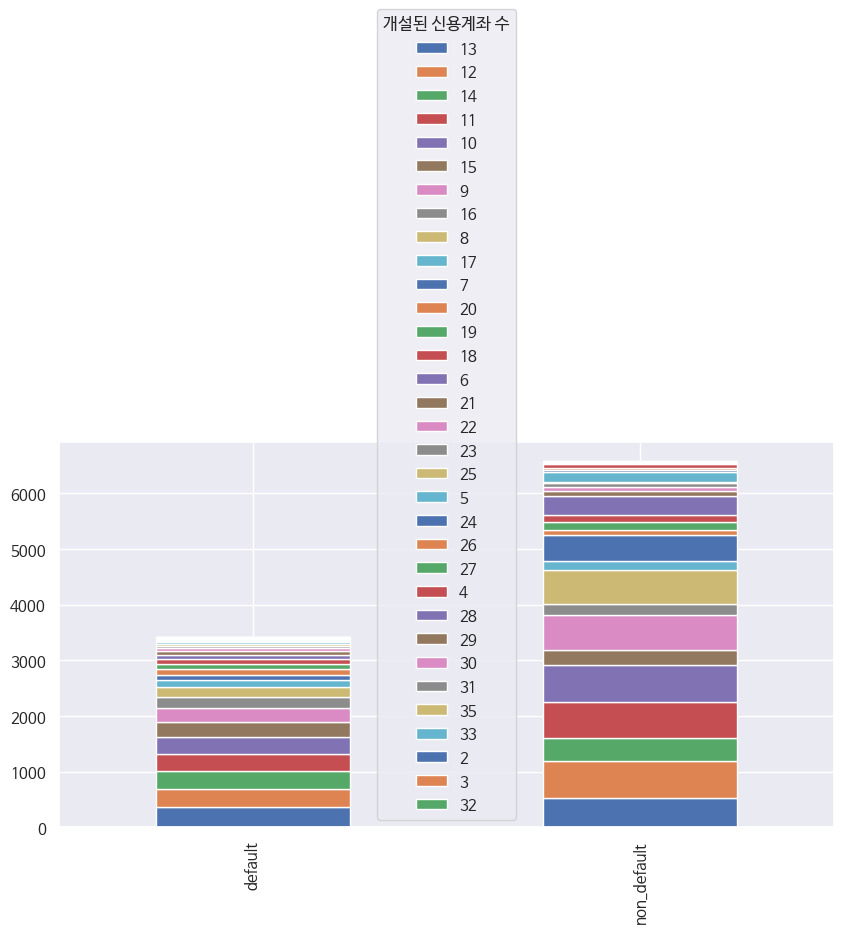

In [99]:
bar_chart('Í∞úÏÑ§Îêú Ïã†Ïö©Í≥ÑÏ¢å Ïàò')

In [100]:
train.groupby("Ï±ÑÎ¨¥ Î∂àÏù¥Ìñâ Ïó¨Î∂Ä")['Í∞úÏÑ§Îêú Ïã†Ïö©Í≥ÑÏ¢å Ïàò'].value_counts(normalize = True).unstack() * 100

Í∞úÏÑ§Îêú Ïã†Ïö©Í≥ÑÏ¢å Ïàò        2         3         4         5         6         7   \
Ï±ÑÎ¨¥ Î∂àÏù¥Ìñâ Ïó¨Î∂Ä                                                                
0           0.030358  0.303582  1.123254  2.656345  5.085003  7.088646   
1           0.029308  0.029308  0.263775  0.849941  2.403283  2.989449   

Í∞úÏÑ§Îêú Ïã†Ïö©Í≥ÑÏ¢å Ïàò        8         9          10        11  ...        25        26  \
Ï±ÑÎ¨¥ Î∂àÏù¥Ìñâ Ïó¨Î∂Ä                                            ...                       
0           9.107468  9.562842  10.230723  9.699454  ...  0.425015  0.440194   
1           5.627198  7.004689   8.763189  9.114889  ...  0.937866  0.410317   

Í∞úÏÑ§Îêú Ïã†Ïö©Í≥ÑÏ¢å Ïàò        27        28        29        30        31        32  \
Ï±ÑÎ¨¥ Î∂àÏù¥Ìñâ Ïó¨Î∂Ä                                                                
0           0.166970  0.151791  0.151791  0.045537  0.091075  0.060716   
1           0.381008  0.234467  0.175850  0.117233  0.029308       NaN   

Í∞úÏÑ§Îêú Ïã†Ïö©Í≥ÑÏ¢å Ïàò        33        35  
Ï±ÑÎ¨¥ Î∂àÏù¥Ìñâ Ïó¨Î∂Ä                       
0           0.015179       NaN  
1           0.029308  0.029308  

[2 rows x 33 columns]

In [101]:
train['Í∞úÏÑ§Îêú Ïã†Ïö©Í≥ÑÏ¢å Ïàò'].value_counts().sort_index()

Í∞úÏÑ§Îêú Ïã†Ïö©Í≥ÑÏ¢å Ïàò
2       3
3      21
4      83
5     204
6     417
7     569
8     792
9     869
10    973
11    950
12    981
13    896
14    735
15    543
16    401
17    280
18    225
19    222
20    198
21    165
22    123
23    106
24     62
25     60
26     43
27     24
28     18
29     16
30      7
31      7
32      4
33      2
35      1
Name: count, dtype: int64

In [102]:
train['Í∞úÏÑ§Îêú Ïã†Ïö©Í≥ÑÏ¢å Ïàò'].describe()

count    10000.000000
mean        12.248900
std          4.620572
min          2.000000
25%          9.000000
50%         12.000000
75%         15.000000
max         35.000000
Name: Í∞úÏÑ§Îêú Ïã†Ïö©Í≥ÑÏ¢å Ïàò, dtype: float64

### ***1.2.8 Ïã†Ïö© Í±∞Îûò Ïó∞Ïàò***

In [103]:
train['Ïã†Ïö© Í±∞Îûò Ïó∞Ïàò'].describe()

count    10000.000000
mean        19.879360
std          7.206693
min          6.000000
25%         14.600000
50%         17.950000
75%         24.100000
max         51.700000
Name: Ïã†Ïö© Í±∞Îûò Ïó∞Ïàò, dtype: float64

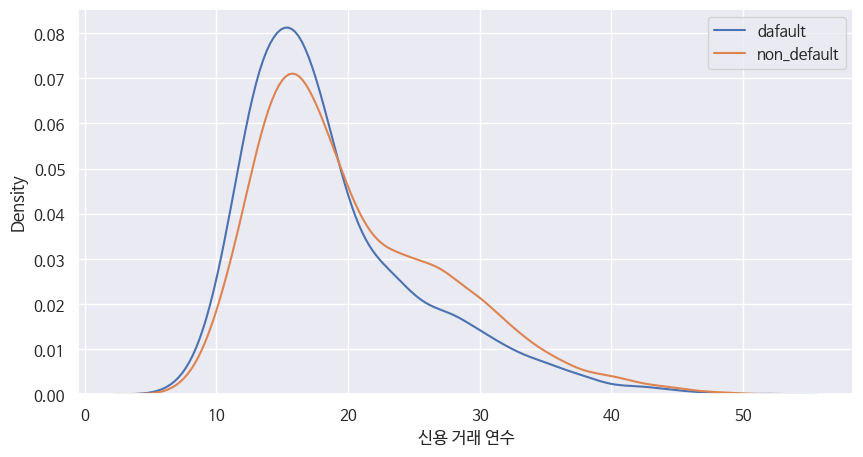

In [104]:
plt.figure(figsize = (10, 5))
sns.kdeplot(default['Ïã†Ïö© Í±∞Îûò Ïó∞Ïàò'],label = 'dafault')
sns.kdeplot(non_default['Ïã†Ïö© Í±∞Îûò Ïó∞Ïàò'], label = 'non_default')

plt.legend()
plt.show()

# 20Î≥¥Îã§ ÏûëÏùÄ Í≤ΩÏö∞ Î∂àÏù¥Ìñâ Í∞ÄÎä•ÏÑ± ÎÜíÏùå

### ***1.2.9 ÏµúÎåÄ Ïã†Ïö©ÌïúÎèÑ***

In [105]:
train['ÏµúÎåÄ Ïã†Ïö©ÌïúÎèÑ'].describe()

count    1.000000e+04
mean     1.175265e+06
std      1.604199e+06
min      0.000000e+00
25%      4.482476e+05
50%      7.670910e+05
75%      1.147283e+06
max      2.323233e+07
Name: ÏµúÎåÄ Ïã†Ïö©ÌïúÎèÑ, dtype: float64

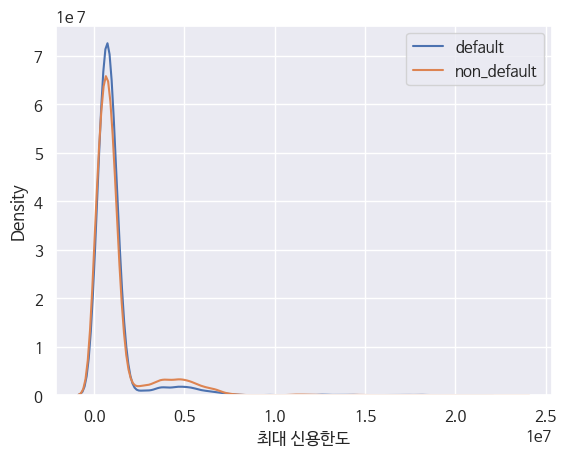

In [106]:
sns.kdeplot(default['ÏµúÎåÄ Ïã†Ïö©ÌïúÎèÑ'], label = 'default')
sns.kdeplot(non_default['ÏµúÎåÄ Ïã†Ïö©ÌïúÎèÑ'], label = 'non_default')

plt.legend()

# 0.09 ~ 0.23 Í≤ΩÏö∞ Î∂àÏù¥Ìñâ Í∞ÄÎä•ÏÑ± ÎÜíÏùå

### ***1.2.10 ÎßàÏßÄÎßâ Ïó∞Ï≤¥ Ïù¥ÌõÑ Í≤ΩÍ≥º Í∞úÏõî Ïàò***

In [107]:
train['ÎßàÏßÄÎßâ Ïó∞Ï≤¥ Ïù¥ÌõÑ Í≤ΩÍ≥º Í∞úÏõî Ïàò'].describe()

count    10000.000000
mean        30.889200
std         20.011561
min          0.000000
25%         14.000000
50%         28.000000
75%         41.000000
max         88.000000
Name: ÎßàÏßÄÎßâ Ïó∞Ï≤¥ Ïù¥ÌõÑ Í≤ΩÍ≥º Í∞úÏõî Ïàò, dtype: float64

<Axes: xlabel='ÎßàÏßÄÎßâ Ïó∞Ï≤¥ Ïù¥ÌõÑ Í≤ΩÍ≥º Í∞úÏõî Ïàò', ylabel='Density'>

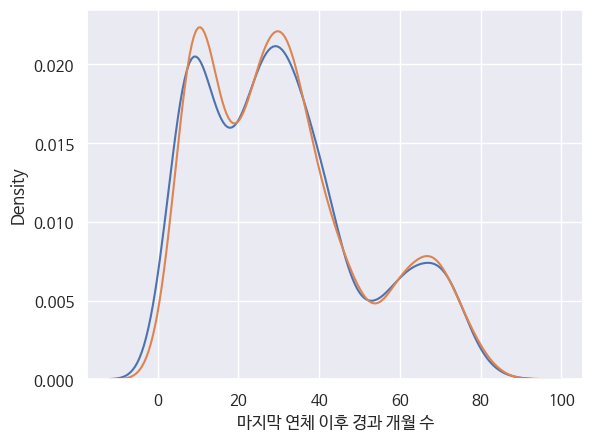

In [108]:
sns.kdeplot(default['ÎßàÏßÄÎßâ Ïó∞Ï≤¥ Ïù¥ÌõÑ Í≤ΩÍ≥º Í∞úÏõî Ïàò'], label = 'default')
sns.kdeplot(non_default['ÎßàÏßÄÎßâ Ïó∞Ï≤¥ Ïù¥ÌõÑ Í≤ΩÍ≥º Í∞úÏõî Ïàò'], label = 'non_default')

### ***1.2.11 Í∞úÏù∏ ÌååÏÇ∞ Ìöü***Ïàò

In [109]:
train['Í∞úÏù∏ ÌååÏÇ∞ ÌöüÏàò'].describe()

count    10000.000000
mean         0.373200
std          0.843797
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max          3.000000
Name: Í∞úÏù∏ ÌååÏÇ∞ ÌöüÏàò, dtype: float64

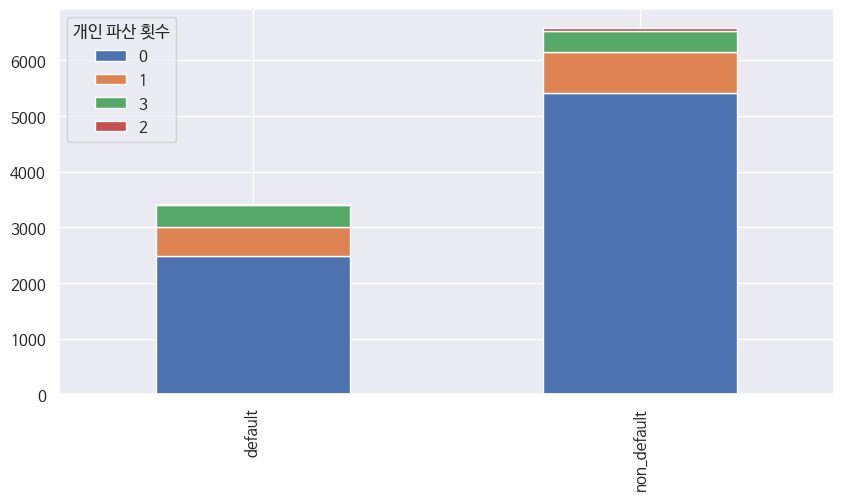

In [110]:
bar_chart('Í∞úÏù∏ ÌååÏÇ∞ ÌöüÏàò')

In [111]:
train.groupby('Ï±ÑÎ¨¥ Î∂àÏù¥Ìñâ Ïó¨Î∂Ä')['Í∞úÏù∏ ÌååÏÇ∞ ÌöüÏàò'].value_counts(normalize = True).unstack() *100

Í∞úÏù∏ ÌååÏÇ∞ ÌöüÏàò           0          1         2          3
Ï±ÑÎ¨¥ Î∂àÏù¥Ìñâ Ïó¨Î∂Ä                                           
0          82.027930  11.338798  0.956284   5.676988
1          72.743259  15.269637  0.322392  11.664713

### ***1.2.12 ÌòÑÏû¨ ÎåÄÏ∂ú ÏûîÏï°***

In [112]:
train['ÌòÑÏû¨ ÎåÄÏ∂ú ÏûîÏï°'].describe()

count    1.000000e+04
mean     5.061200e+05
std      2.831462e+05
min      2.917650e+04
25%      3.001901e+05
50%      4.743412e+05
75%      5.919079e+05
max      1.373613e+06
Name: ÌòÑÏû¨ ÎåÄÏ∂ú ÏûîÏï°, dtype: float64

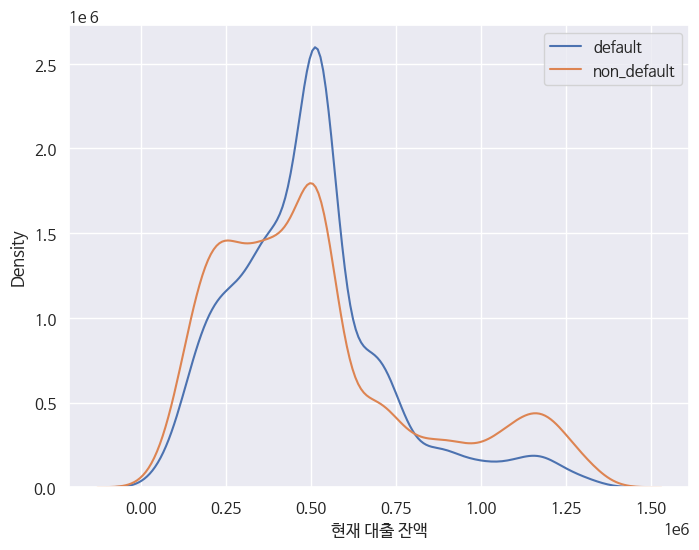

In [113]:
plt.figure(figsize=(8, 6))

sns.kdeplot(default['ÌòÑÏû¨ ÎåÄÏ∂ú ÏûîÏï°'], label = 'default')
sns.kdeplot(non_default['ÌòÑÏû¨ ÎåÄÏ∂ú ÏûîÏï°'], label = 'non_default')

plt.legend()

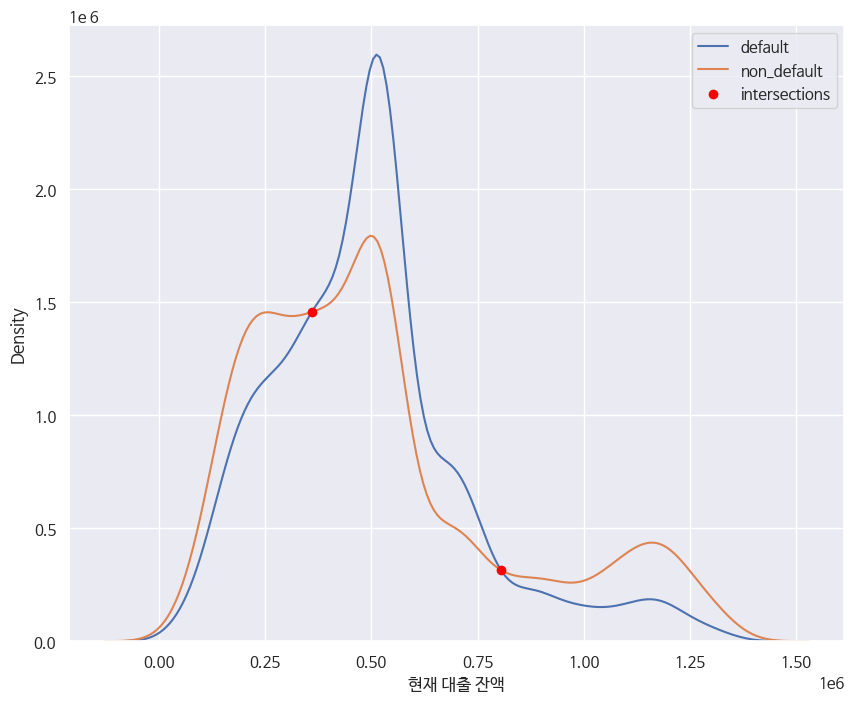

ÍµêÏ∞®Ï†ê 1 : x = 359558.39, y =  0.0000
ÍµêÏ∞®Ï†ê 2 : x = 805145.62, y =  0.0000


In [114]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import gaussian_kde
from scipy.optimize import fsolve

# KDE Í∞ùÏ≤¥ ÏÉùÏÑ±
kde_default = gaussian_kde(default['ÌòÑÏû¨ ÎåÄÏ∂ú ÏûîÏï°'])
kde_non_default = gaussian_kde(non_default['ÌòÑÏû¨ ÎåÄÏ∂ú ÏûîÏï°'])

# Îëê Ìï®ÏàòÏùò Ï∞®Ïù¥Î•º 0ÏúºÎ°ú ÎßåÎìúÎäî xÍ∞í Ï∞æÍ∏∞
def find_intersection(x):
  return kde_default(x) - kde_non_default(x)

# fsolveÎ•º Ïù¥Ïö©Ìï¥ ÍµêÏ∞®Ï†ê Ï∞æÍ∏∞
x_intersections = fsolve(find_intersection, x0 = [291760, 810000]) # fsolveÎäî Î∞©Ï†ÅÏãùÏùò Ìï¥Î•º Ï∞æÎäî Ìï®ÏàòÎ°ú find_section = 0Ïù¥ ÎêòÎäî x Í∞íÏùÑ Ï∞æÏïÑÏ§å, Ï¥àÍ∏∞ Ï∂îÏ†ïÍ∞í x0=[291760, 810000]ÏùÑ Í∏∞Ï§ÄÏúºÎ°ú Ìï¥Î•º ÌÉêÏÉâ, ÍµêÏ∞®Ï†êÏù¥ ÏûàÏùÑ Í≤ÉÏúºÎ°ú ÏóêÏÉÅÎêòÎäî ÏßÄÏ†êÏùÑ ÏÑ§Ï†ïÌï¥Ïïº Ìï®
y_intersections = kde_default(x_intersections)

plt.figure(figsize = (10, 8))
sns.kdeplot(default['ÌòÑÏû¨ ÎåÄÏ∂ú ÏûîÏï°'], label = 'default')
sns.kdeplot(non_default['ÌòÑÏû¨ ÎåÄÏ∂ú ÏûîÏï°'], label = 'non_default')

# ÍµêÏ∞®Ï†ê ÏãúÍ∞ÅÌôî
plt.scatter(x_intersections, y_intersections, color = 'red', zorder = 3, label = 'intersections')

plt.legend()
plt.show()

# ÍµêÏ∞®Ï†ê Ï∂úÎ†•
for i,(x,y) in enumerate(zip(x_intersections, y_intersections)):
  print(f"ÍµêÏ∞®Ï†ê {i+1} : x = {x :.2f}, y = {y : .4f}")

### ***1.2.13 ÌòÑÏû¨ ÎØ∏ÏÉÅÌôò Ïã†Ïö©Ïï°***

In [115]:
train['ÌòÑÏû¨ ÎØ∏ÏÉÅÌôò Ïã†Ïö©Ïï°'].describe()

count    1.000000e+04
mean     3.649126e+05
std      3.537942e+05
min      0.000000e+00
25%      1.471856e+05
50%      2.547930e+05
75%      4.749180e+05
max      3.946300e+06
Name: ÌòÑÏû¨ ÎØ∏ÏÉÅÌôò Ïã†Ïö©Ïï°, dtype: float64

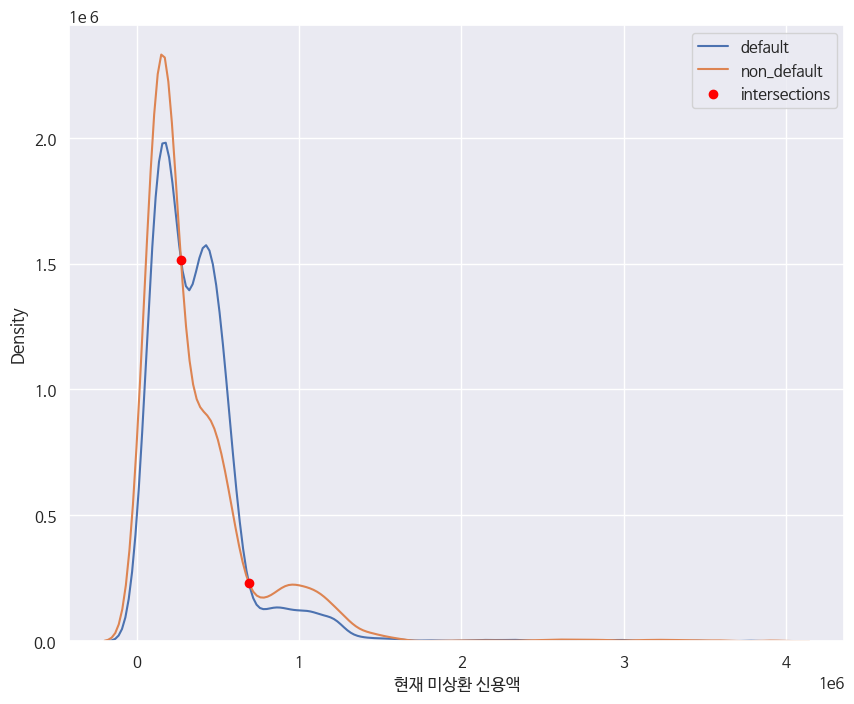

 ÍµêÏ∞®Ï†ê 1 : x =  273172.56, y =  0.0000
 ÍµêÏ∞®Ï†ê 2 : x =  691724.91, y =  0.0000


In [116]:
# kde Ìï®Ïàò ÏÉùÏÑ±
kde_default = gaussian_kde(default['ÌòÑÏû¨ ÎØ∏ÏÉÅÌôò Ïã†Ïö©Ïï°'])
kde_nondefault = gaussian_kde(non_default['ÌòÑÏû¨ ÎØ∏ÏÉÅÌôò Ïã†Ïö©Ïï°'])


# Îëê Ìï®ÏàòÏùò Ï∞®Ïù¥Î•º 0ÏúºÎ°ú ÎßåÎìúÎäî xÍ∞í Ï∞æÍ∏∞
def find_intersection(x):
  return kde_default(x) - kde_nondefault(x)

# fsolveÎ•º Ïù¥Ïö©Ìï¥ ÍµêÏ∞®Ï†ê Ï∞æÍ∏∞
x_intersections = fsolve(find_intersection, x0 =[290000, 500000])
y_intersections = kde_default(x_intersections)

plt.figure(figsize = (10, 8))
sns.kdeplot(default['ÌòÑÏû¨ ÎØ∏ÏÉÅÌôò Ïã†Ïö©Ïï°'], label = 'default')
sns.kdeplot(non_default['ÌòÑÏû¨ ÎØ∏ÏÉÅÌôò Ïã†Ïö©Ïï°'], label = 'non_default')

# ÍµêÏ∞®Ï†ê ÏãúÍ∞ÅÌôî
plt.scatter(x_intersections, y_intersections, color = 'red', zorder = 2, label = 'intersections')

plt.legend()
plt.show()

# ÍµêÏ∞®Ï†ê Ï∂úÎ†•
for i,(x, y) in enumerate(zip(x_intersections, y_intersections)) :
  print(f" ÍµêÏ∞®Ï†ê {i + 1} : x = {x : .2f}, y = {y : .4f}")


### ***1.2.14 Ïõî ÏÉÅÌôò Î∂ÄÏ±ÑÏï°***

In [117]:
train['Ïõî ÏÉÅÌôò Î∂ÄÏ±ÑÏï°'].describe()

count     10000.00000
mean      22367.28075
std       15186.49738
min           0.00000
25%       10893.75000
50%       20160.00000
75%       30647.25000
max      153574.50000
Name: Ïõî ÏÉÅÌôò Î∂ÄÏ±ÑÏï°, dtype: float64

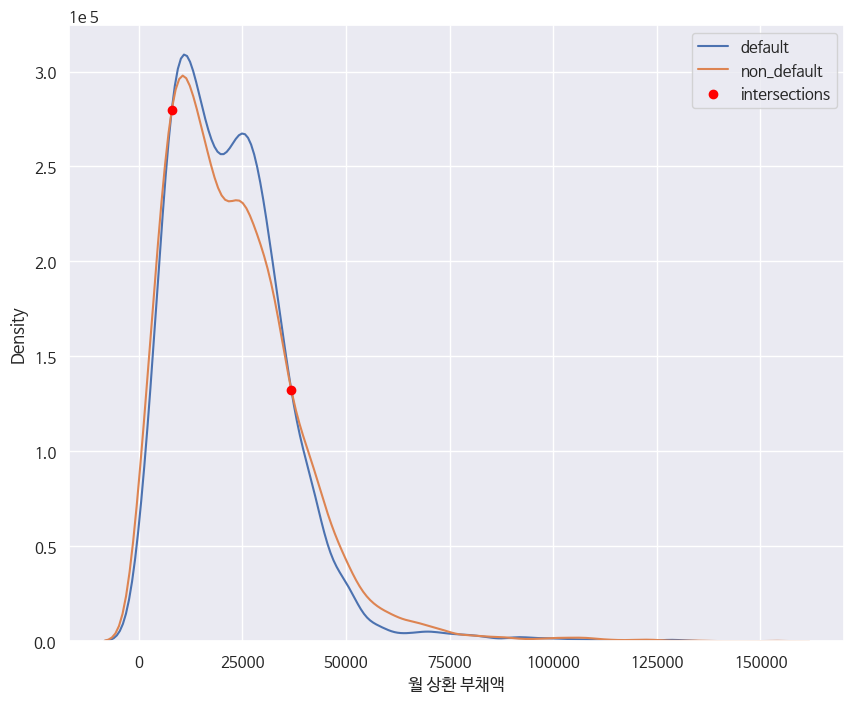

ÍµêÏ∞®Ï†ê 1 : x =  7988.18, y =  0.0000
ÍµêÏ∞®Ï†ê 2 : x =  36804.37, y =  0.0000


In [118]:
# kde Ìï®Ïàò ÏÉùÏÑ±
kde_default = gaussian_kde(default['Ïõî ÏÉÅÌôò Î∂ÄÏ±ÑÏï°'])
kde_nondefault = gaussian_kde(non_default['Ïõî ÏÉÅÌôò Î∂ÄÏ±ÑÏï°'])

# Îëê Ìï®ÏàòÏùò Ï∞®Ïù¥Í∞Ä 0Ïù∏ xÍ∞í Ï∞æÍ∏∞
def find_intersection(x) :
  return kde_default(x) - kde_nondefault(x)

# fsolveÎ•º Ïù¥Ïö©Ìï¥ ÍµêÏ∞®Ï†ê Ï∞æÍ∏∞
x_intersections = fsolve(find_intersection, x0 = [9000,30647])
y_intersections = kde_default(x_intersections)

plt.figure(figsize = (10, 8))
sns.kdeplot(default['Ïõî ÏÉÅÌôò Î∂ÄÏ±ÑÏï°'], label = 'default')
sns.kdeplot(non_default['Ïõî ÏÉÅÌôò Î∂ÄÏ±ÑÏï°'], label = 'non_default')

# ÍµêÏ∞®Ï†ê ÏãúÍ∞ÅÌôî
plt.scatter(x_intersections, y_intersections, color = 'red', zorder = 3, label = 'intersections')

plt.legend()
plt.show()

# ÍµêÏ∞®Ï†ê Ï∂úÎ†•
for i,(x,y) in enumerate(zip(x_intersections, y_intersections)) :
  print(f"ÍµêÏ∞®Ï†ê {i + 1} : x = {x : .2f}, y = {y : .4f}")


### ***1.2.15 Ïã†Ïö© Ï†êÏàò***

In [119]:
train['Ïã†Ïö© Ï†êÏàò'].describe()

count    10000.000000
mean       744.215000
std         56.995698
min        502.000000
25%        704.000000
50%        756.000000
75%        793.000000
max        825.000000
Name: Ïã†Ïö© Ï†êÏàò, dtype: float64

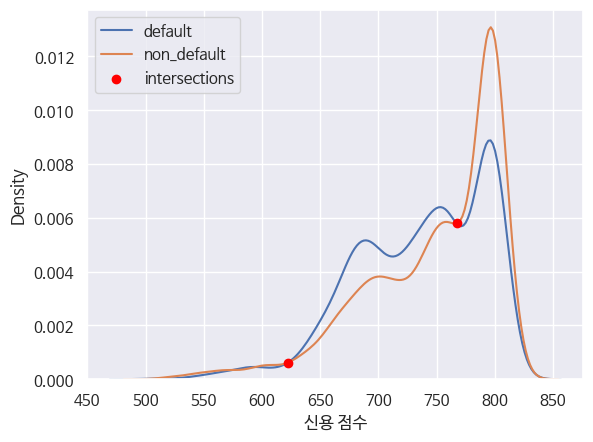

ÍµêÏ∞®Ï†ê 1 : x =  622.07, y =  0.00
ÍµêÏ∞®Ï†ê 2 : x =  767.19, y =  0.01


In [120]:
#kde Ìï®Ïàò ÏÉùÏÑ±
kde_default = gaussian_kde(default['Ïã†Ïö© Ï†êÏàò'])
kde_nondefault = gaussian_kde([non_default['Ïã†Ïö© Ï†êÏàò']])

# ÍµêÏ∞®Ï†ê Ï∞æÎäî Ìï®Ïàò ÏÉùÏÑ±
def find_intersection(x) :
  return kde_default(x) - kde_nondefault(x)

# ÍµêÏ∞®Ï†ê Ï∞æÍ∏∞
x_intersections = fsolve(find_intersection, x0 = [620, 793])
y_intersections = kde_default(x_intersections)

sns.kdeplot(default['Ïã†Ïö© Ï†êÏàò'], label = 'default')
sns.kdeplot(non_default['Ïã†Ïö© Ï†êÏàò'], label = 'non_default')

# ÍµêÏ∞®Ï†ê Í∑∏ÎûòÌîÑ
plt.scatter(x_intersections, y_intersections, color = 'red', zorder = 3, label = 'intersections')

plt.legend()
plt.show()

# ÍµêÏ∞®Ï†ê Ï∂úÎ†•
for i,(x, y) in enumerate(zip(x_intersections, y_intersections)) :
  print(f"ÍµêÏ∞®Ï†ê { i + 1} : x = {x : .2f}, y = {y : .2f}")

# ***2. Feature Engineering***

## ***2.1 Î¨∏ÏûêÌòï Î≥ÄÏàò Î≤îÏ£ºÌòï Î≥ÄÏàòÎ°ú Î≥ÄÍ≤Ω***
Ï£ºÍ±∞ÌòïÌÉú, ÌòÑÏû¨ ÏßÅÏû• Í∑ºÏÜç Ïó∞Ïàò, ÎåÄÏ∂ú Î™©Ï†Å, ÎåÄÏ∂ú ÏÉÅÌôò Í∏∞Í∞Ñ

In [165]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 18 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   UID                10000 non-null  object 
 1   Ï£ºÍ±∞ ÌòïÌÉú              10000 non-null  object 
 2   Ïó∞Í∞Ñ ÏÜåÎìù              10000 non-null  float64
 3   ÌòÑÏû¨ ÏßÅÏû• Í∑ºÏÜç Ïó∞Ïàò        10000 non-null  object 
 4   Ï≤¥ÎÇ© ÏÑ∏Í∏à ÏïïÎ•ò ÌöüÏàò        10000 non-null  float64
 5   Í∞úÏÑ§Îêú Ïã†Ïö©Í≥ÑÏ¢å Ïàò         10000 non-null  int64  
 6   Ïã†Ïö© Í±∞Îûò Ïó∞Ïàò           10000 non-null  float64
 7   ÏµúÎåÄ Ïã†Ïö©ÌïúÎèÑ            10000 non-null  float64
 8   Ïã†Ïö© Î¨∏Ï†ú Î∞úÏÉù ÌöüÏàò        10000 non-null  int64  
 9   ÎßàÏßÄÎßâ Ïó∞Ï≤¥ Ïù¥ÌõÑ Í≤ΩÍ≥º Í∞úÏõî Ïàò  10000 non-null  int64  
 10  Í∞úÏù∏ ÌååÏÇ∞ ÌöüÏàò           10000 non-null  int64  
 11  ÎåÄÏ∂ú Î™©Ï†Å              10000 non-null  object 
 12  ÎåÄÏ∂ú ÏÉÅÌôò Í∏∞Í∞Ñ           10000 non-null  object 
 13  ÌòÑÏû¨ 

### ***2.1.1 Ï£ºÍ±∞ ÌòïÌÉú(train, test)***

In [166]:
train['Ï£ºÍ±∞ ÌòïÌÉú'].unique()

array(['ÏûêÍ∞Ä', 'ÏõîÏÑ∏', 'Ï£ºÌÉù Îã¥Î≥¥ ÎåÄÏ∂ú (Í±∞Ï£º Ï§ë)', 'Ï£ºÌÉù Îã¥Î≥¥ ÎåÄÏ∂ú (ÎπÑÍ±∞Ï£º Ï§ë)'], dtype=object)

In [167]:
train['Ï£ºÍ±∞ ÌòïÌÉú'].value_counts()

Ï£ºÍ±∞ ÌòïÌÉú
ÏõîÏÑ∏                  4050
Ï£ºÌÉù Îã¥Î≥¥ ÎåÄÏ∂ú (Í±∞Ï£º Ï§ë)     3633
ÏûêÍ∞Ä                  2241
Ï£ºÌÉù Îã¥Î≥¥ ÎåÄÏ∂ú (ÎπÑÍ±∞Ï£º Ï§ë)      76
Name: count, dtype: int64

In [168]:
train['Ï£ºÍ±∞ ÌòïÌÉú'] = train['Ï£ºÍ±∞ ÌòïÌÉú'].replace({'ÏõîÏÑ∏' : 0, 'Ï£ºÌÉù Îã¥Î≥¥ ÎåÄÏ∂ú (Í±∞Ï£º Ï§ë)' : 1,'ÏûêÍ∞Ä' : 2, 'Ï£ºÌÉù Îã¥Î≥¥ ÎåÄÏ∂ú (ÎπÑÍ±∞Ï£º Ï§ë)' : 3})

In [169]:
test['Ï£ºÍ±∞ ÌòïÌÉú'] = test['Ï£ºÍ±∞ ÌòïÌÉú'].replace({'ÏõîÏÑ∏' : 0, 'Ï£ºÌÉù Îã¥Î≥¥ ÎåÄÏ∂ú (Í±∞Ï£º Ï§ë)' : 1,'ÏûêÍ∞Ä' : 2, 'Ï£ºÌÉù Îã¥Î≥¥ ÎåÄÏ∂ú (ÎπÑÍ±∞Ï£º Ï§ë)' : 3})

In [170]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 18 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   UID                10000 non-null  object 
 1   Ï£ºÍ±∞ ÌòïÌÉú              10000 non-null  int64  
 2   Ïó∞Í∞Ñ ÏÜåÎìù              10000 non-null  float64
 3   ÌòÑÏû¨ ÏßÅÏû• Í∑ºÏÜç Ïó∞Ïàò        10000 non-null  object 
 4   Ï≤¥ÎÇ© ÏÑ∏Í∏à ÏïïÎ•ò ÌöüÏàò        10000 non-null  float64
 5   Í∞úÏÑ§Îêú Ïã†Ïö©Í≥ÑÏ¢å Ïàò         10000 non-null  int64  
 6   Ïã†Ïö© Í±∞Îûò Ïó∞Ïàò           10000 non-null  float64
 7   ÏµúÎåÄ Ïã†Ïö©ÌïúÎèÑ            10000 non-null  float64
 8   Ïã†Ïö© Î¨∏Ï†ú Î∞úÏÉù ÌöüÏàò        10000 non-null  int64  
 9   ÎßàÏßÄÎßâ Ïó∞Ï≤¥ Ïù¥ÌõÑ Í≤ΩÍ≥º Í∞úÏõî Ïàò  10000 non-null  int64  
 10  Í∞úÏù∏ ÌååÏÇ∞ ÌöüÏàò           10000 non-null  int64  
 11  ÎåÄÏ∂ú Î™©Ï†Å              10000 non-null  object 
 12  ÎåÄÏ∂ú ÏÉÅÌôò Í∏∞Í∞Ñ           10000 non-null  object 
 13  ÌòÑÏû¨ 

### ***2.1.2 ÌòÑÏû¨ ÏßÅÏû• Í∑ºÏÜç Ïó∞Ïàò(train, test)***

In [171]:
train['ÌòÑÏû¨ ÏßÅÏû• Í∑ºÏÜç Ïó∞Ïàò'].unique()

array(['10ÎÖÑ Ïù¥ÏÉÅ', '4ÎÖÑ', '6ÎÖÑ', '2ÎÖÑ', '8ÎÖÑ', '3ÎÖÑ', '5ÎÖÑ', '9ÎÖÑ', '7ÎÖÑ', '1ÎÖÑ ÎØ∏Îßå',
       '1ÎÖÑ'], dtype=object)

In [172]:
import re

# Ïà´Ïûê Î≥ÄÌôò Ìï®Ïàò
def convert_to_number(text) :
  if 'ÎØ∏Îßå' in text :
    return 0
  match = re.search(r'\d+', text) # re.search() : Î¨∏ÏûêÏó¥ÏóêÏÑú Ïà´ÏûêÏ∞æÍ∏∞, \d : 0~9 Ï†ïÍ∑úÏãù, + : ÌïòÎÇò Ïù¥ÏÉÅ
  return int(match.group()) if match else None # match : Í∞ùÏ≤¥ÏóêÏÑú Ïã§Ï†úÎ°ú ÏùºÏπòÌïú ÌÖçÏä§Ìä∏Ïù¥ÎØÄÎ°ú Ïà´ÏûêÎ•º Ï∂úÎ†•ÌïòÍ∏∞ ÏúÑÌï¥ÏÑúÎäî match.group() Ìï¥Ïïº Ìï®!

train['ÌòÑÏû¨ ÏßÅÏû• Í∑ºÏÜç Ïó∞Ïàò'] = train['ÌòÑÏû¨ ÏßÅÏû• Í∑ºÏÜç Ïó∞Ïàò'].apply(convert_to_number) # ÌòÑÏû¨ ÏßÅÏû• Í∑ºÏÜç Ïó∞Ïàò Í∞íÏùÑ convert_to_number Ìï®ÏàòÏóê Ï†ÅÏö©
train.head()

UID  Ï£ºÍ±∞ ÌòïÌÉú      Ïó∞Í∞Ñ ÏÜåÎìù  ÌòÑÏû¨ ÏßÅÏû• Í∑ºÏÜç Ïó∞Ïàò  Ï≤¥ÎÇ© ÏÑ∏Í∏à ÏïïÎ•ò ÌöüÏàò  Í∞úÏÑ§Îêú Ïã†Ïö©Í≥ÑÏ¢å Ïàò  \
0  TRAIN_00000      2  1941337.5           10          0.0           9   
1  TRAIN_00001      0  1979505.0           10          0.0           5   
2  TRAIN_00002      0  1356381.0            4          0.0          12   
3  TRAIN_00003      0  1049017.5            6          0.0          15   
4  TRAIN_00004      0  4320217.5            2          0.0          11   

   Ïã†Ïö© Í±∞Îûò Ïó∞Ïàò   ÏµúÎåÄ Ïã†Ïö©ÌïúÎèÑ  Ïã†Ïö© Î¨∏Ï†ú Î∞úÏÉù ÌöüÏàò  ÎßàÏßÄÎßâ Ïó∞Ï≤¥ Ïù¥ÌõÑ Í≤ΩÍ≥º Í∞úÏõî Ïàò  Í∞úÏù∏ ÌååÏÇ∞ ÌöüÏàò  ÎåÄÏ∂ú Î™©Ï†Å  \
0      13.4  400597.5            0                 24         1  Î∂ÄÏ±Ñ ÌÜµÌï©   
1      15.1  360679.5            0                 11         0  Î∂ÄÏ±Ñ ÌÜµÌï©   
2      18.8  491770.5            1                 74         3  Î∂ÄÏ±Ñ ÌÜµÌï©   
3      14.8  411546.0            1                 22         1  Î∂ÄÏ±Ñ ÌÜµÌï©   
4      26.1  895288.5            0                 32         0  Î∂ÄÏ±Ñ ÌÜµÌï©   

  ÎåÄÏ∂ú ÏÉÅÌôò Í∏∞Í∞Ñ   ÌòÑÏû¨ ÎåÄÏ∂ú ÏûîÏï°  ÌòÑÏû¨ ÎØ∏ÏÉÅÌôò Ïã†Ïö©Ïï°  Ïõî ÏÉÅÌôò Î∂ÄÏ±ÑÏï°  Ïã†Ïö© Ï†êÏàò  Ï±ÑÎ¨¥ Î∂àÏù¥Ìñâ Ïó¨Î∂Ä  
0    Îã®Í∏∞ ÏÉÅÌôò   390903.0    225457.5    8806.5    767          0  
1    Îã®Í∏∞ ÏÉÅÌôò  1002184.5     64749.0   24961.5    767          0  
2    Îã®Í∏∞ ÏÉÅÌôò   227775.0    487644.0   12069.0    800          1  
3    Îã®Í∏∞ ÏÉÅÌôò   251383.5    413211.0   31749.0    796          1  
4    Ïû•Í∏∞ ÏÉÅÌôò  1163176.5     78991.5    5862.0    751          0

In [173]:
test['ÌòÑÏû¨ ÏßÅÏû• Í∑ºÏÜç Ïó∞Ïàò'] = test['ÌòÑÏû¨ ÏßÅÏû• Í∑ºÏÜç Ïó∞Ïàò'].apply(convert_to_number)
test['ÌòÑÏû¨ ÏßÅÏû• Í∑ºÏÜç Ïó∞Ïàò'].value_counts()

ÌòÑÏû¨ ÏßÅÏû• Í∑ºÏÜç Ïó∞Ïàò
10    753
2     188
3     165
0     145
5     144
4     140
1     136
7     121
6     100
8      99
9      71
Name: count, dtype: int64

In [174]:
train['ÌòÑÏû¨ ÏßÅÏû• Í∑ºÏÜç Ïó∞Ïàò'].info()

<class 'pandas.core.series.Series'>
RangeIndex: 10000 entries, 0 to 9999
Series name: ÌòÑÏû¨ ÏßÅÏû• Í∑ºÏÜç Ïó∞Ïàò
Non-Null Count  Dtype
--------------  -----
10000 non-null  int64
dtypes: int64(1)
memory usage: 78.3 KB


In [175]:
train['ÌòÑÏû¨ ÏßÅÏû• Í∑ºÏÜç Ïó∞Ïàò'] = train['ÌòÑÏû¨ ÏßÅÏû• Í∑ºÏÜç Ïó∞Ïàò'].apply(lambda x : 0 if x == 0
                                                  else 1 if 1 <= x <= 3
                                                  else 2 if 4 <= x <=6
                                                        else 3 if 7 <= x <= 9
                                                              else 4
                                                  )
train['ÌòÑÏû¨ ÏßÅÏû• Í∑ºÏÜç Ïó∞Ïàò'].head(10)

0    4
1    4
2    2
3    2
4    1
5    4
6    3
7    1
8    1
9    1
Name: ÌòÑÏû¨ ÏßÅÏû• Í∑ºÏÜç Ïó∞Ïàò, dtype: int64

In [176]:
train['ÌòÑÏû¨ ÏßÅÏû• Í∑ºÏÜç Ïó∞Ïàò'].value_counts()

ÌòÑÏû¨ ÏßÅÏû• Í∑ºÏÜç Ïó∞Ïàò
4    3828
1    2329
3    1728
2    1627
0     488
Name: count, dtype: int64

In [177]:
test['ÌòÑÏû¨ ÏßÅÏû• Í∑ºÏÜç Ïó∞Ïàò'] = test['ÌòÑÏû¨ ÏßÅÏû• Í∑ºÏÜç Ïó∞Ïàò'].apply(lambda x : 0 if x == 0
                                                else 1 if 1 <= x <= 3
                                                else 2 if 4 <= x <= 6
                                                else 3 if 7 <= x <= 9
                                                else 4)
test['ÌòÑÏû¨ ÏßÅÏû• Í∑ºÏÜç Ïó∞Ïàò'].value_counts()

ÌòÑÏû¨ ÏßÅÏû• Í∑ºÏÜç Ïó∞Ïàò
4    753
1    489
2    384
3    291
0    145
Name: count, dtype: int64

### ***2.1.3 ÎåÄÏ∂ú Î™©Ï†Å***

üìå Î∂àÍ∑†Ìòï Îç∞Ïù¥ÌÑ∞ÎùºÍ≥† Ìï¥ÏÑú Î¨¥Ï°∞Í±¥ 0, 1Î°ú Î∂ÑÎ•òÌïòÎäî Í≤ÉÏùÄ Ïò≥ÏßÄ ÏïäÏùå  
üìå Í∞Å Î≤îÏ£ºÏùò ÏÑ±Í≤©Ïù¥ ÎèôÏùºÌïú Í≤ÉÎÅºÎ¶¨ Î¨∂Îäî Í≤ÉÏù¥ Ï¢ãÏùå  
üìå ÏùºÎ∞òÏ†ÅÏúºÎ°ú ÏÜåÎπÑÏÑ± ÎåÄÏ∂ú vs ÏÉùÏÇ∞ÏÑ± ÎåÄÏ∂úÎ°ú Íµ¨Î∂Ñ  
* Î∂ÄÏ±ÑÌÜµÌï© = 0
* ÏÉùÏÇ∞ÏÑ± ÎåÄÏ∂ú(ÏÇ¨ÏóÖ ÎåÄÏ∂ú, ÏÜåÍ∑úÎ™® ÏÇ¨ÏóÖ ÏûêÍ∏à) = 1
* Ï£ºÍ±∞ Í¥ÄÎ†® ÎåÄÏ∂ú(Ï£ºÌÉù Í∞úÎ≥¥Ïàò, Ï£ºÌÉù Íµ¨Îß§, Ïù¥ÏÇ¨ ÎπÑÏö©) = 2
* ÏÜåÎπÑÏÑ± ÎåÄÏ∂ú(Ïó¨Ìñâ ÏûêÍ∏à, ÏûêÎèôÏ∞® Íµ¨Îß§, Í≥†Ïï° Íµ¨Îß§, Í≤∞Ìòº ÏûêÍ∏à, Ìú¥Í∞Ä ÎπÑÏö©) = 3
* Í∏¥Í∏âÏÑ± ÎåÄÏ∂ú(ÏùòÎ£åÎπÑ, ÍµêÏú°ÎπÑ) = 4
* Í∏∞ÌÉÄ = 5

In [178]:
train['ÎåÄÏ∂ú Î™©Ï†Å'].unique()

array(['Î∂ÄÏ±Ñ ÌÜµÌï©', 'ÏûêÎèôÏ∞® Íµ¨Îß§', 'Í∏∞ÌÉÄ', 'ÏÇ¨ÏóÖ ÎåÄÏ∂ú', 'Ï£ºÌÉù Í∞úÎ≥¥Ïàò', 'Ïó¨Ìñâ ÏûêÍ∏à', 'ÏÜåÍ∑úÎ™® ÏÇ¨ÏóÖ ÏûêÍ∏à',
       'ÍµêÏú°ÎπÑ', 'ÏùòÎ£åÎπÑ', 'Í≥†Ïï° Íµ¨Îß§', 'Í≤∞Ìòº ÏûêÍ∏à', 'Ìú¥Í∞Ä ÎπÑÏö©', 'Ï£ºÌÉù Íµ¨Îß§', 'Ïù¥ÏÇ¨ ÎπÑÏö©'],
      dtype=object)

In [179]:
train['ÎåÄÏ∂ú Î™©Ï†Å'] = train['ÎåÄÏ∂ú Î™©Ï†Å'].apply(lambda x : 0 if x == 'Î∂ÄÏ±Ñ ÌÜµÌï©'
                                      else 1 if x == 'ÏÇ¨ÏóÖ ÎåÄÏ∂ú' or x == 'ÏÜåÍ∑úÎ™® ÏÇ¨ÏóÖ ÏûêÍ∏à'
                                      else 2 if x == 'Ï£ºÌÉù Í∞úÎ≥¥Ïàò' or x == 'Ï£ºÌÉù Íµ¨Îß§' or x == 'Ïù¥ÏÇ¨ ÎπÑÏö©'
                                      else 3 if x == 'Ïó¨Ìñâ ÏûêÍ∏à' or x == 'ÏûêÎèôÏ∞® Íµ¨Îß§' or x == 'Í≥†Ïï° Íµ¨Îß§' or x == 'Í≤∞Ìòº ÏûêÍ∏à' or x == 'Ìú¥Í∞Ä ÎπÑÏö©'
                                      else 4 if x == 'ÏùòÎ£åÎπÑ' or x == 'ÍµêÏú°ÎπÑ'
                                      else 5)
train['ÎåÄÏ∂ú Î™©Ï†Å'].value_counts()

ÎåÄÏ∂ú Î™©Ï†Å
0    7294
5     970
2     939
3     356
1     280
4     161
Name: count, dtype: int64

In [180]:
test['ÎåÄÏ∂ú Î™©Ï†Å'] = test['ÎåÄÏ∂ú Î™©Ï†Å'].apply(lambda x : 0 if x == 'Î∂ÄÏ±Ñ ÌÜµÌï©'
                                      else 1 if x == 'ÏÇ¨ÏóÖ ÎåÄÏ∂ú' or x == 'ÏÜåÍ∑úÎ™® ÏÇ¨ÏóÖ ÏûêÍ∏à'
                                      else 2 if x == 'Ï£ºÌÉù Í∞úÎ≥¥Ïàò' or x == 'Ï£ºÌÉù Íµ¨Îß§' or x == 'Ïù¥ÏÇ¨ ÎπÑÏö©'
                                      else 3 if x == 'Ïó¨Ìñâ ÏûêÍ∏à' or x == 'ÏûêÎèôÏ∞® Íµ¨Îß§' or x == 'Í≥†Ïï° Íµ¨Îß§' or x == 'Í≤∞Ìòº ÏûêÍ∏à' or x == 'Ìú¥Í∞Ä ÎπÑÏö©'
                                      else 4 if x == 'ÏùòÎ£åÎπÑ' or x == 'ÍµêÏú°ÎπÑ'
                                      else 5)
test['ÎåÄÏ∂ú Î™©Ï†Å'].value_counts()

ÎåÄÏ∂ú Î™©Ï†Å
0    1633
5     175
2     129
3      57
1      41
4      27
Name: count, dtype: int64

### ***2.1.4 ÎåÄÏ∂ú ÏÉÅÌôò Í∏∞Í∞Ñ***

In [181]:
train['ÎåÄÏ∂ú ÏÉÅÌôò Í∏∞Í∞Ñ'].unique()

array(['Îã®Í∏∞ ÏÉÅÌôò', 'Ïû•Í∏∞ ÏÉÅÌôò'], dtype=object)

In [182]:
train['ÎåÄÏ∂ú ÏÉÅÌôò Í∏∞Í∞Ñ'] = train['ÎåÄÏ∂ú ÏÉÅÌôò Í∏∞Í∞Ñ'].replace({'Îã®Í∏∞ ÏÉÅÌôò' : 0, 'Ïû•Í∏∞ ÏÉÅÌôò' : 1 })
test['ÎåÄÏ∂ú ÏÉÅÌôò Í∏∞Í∞Ñ'] = test['ÎåÄÏ∂ú ÏÉÅÌôò Í∏∞Í∞Ñ'].replace({'Îã®Í∏∞ ÏÉÅÌôò' : 0, 'Ïû•Í∏∞ ÏÉÅÌôò' : 1 })

In [183]:
train.head()

UID  Ï£ºÍ±∞ ÌòïÌÉú      Ïó∞Í∞Ñ ÏÜåÎìù  ÌòÑÏû¨ ÏßÅÏû• Í∑ºÏÜç Ïó∞Ïàò  Ï≤¥ÎÇ© ÏÑ∏Í∏à ÏïïÎ•ò ÌöüÏàò  Í∞úÏÑ§Îêú Ïã†Ïö©Í≥ÑÏ¢å Ïàò  \
0  TRAIN_00000      2  1941337.5            4          0.0           9   
1  TRAIN_00001      0  1979505.0            4          0.0           5   
2  TRAIN_00002      0  1356381.0            2          0.0          12   
3  TRAIN_00003      0  1049017.5            2          0.0          15   
4  TRAIN_00004      0  4320217.5            1          0.0          11   

   Ïã†Ïö© Í±∞Îûò Ïó∞Ïàò   ÏµúÎåÄ Ïã†Ïö©ÌïúÎèÑ  Ïã†Ïö© Î¨∏Ï†ú Î∞úÏÉù ÌöüÏàò  ÎßàÏßÄÎßâ Ïó∞Ï≤¥ Ïù¥ÌõÑ Í≤ΩÍ≥º Í∞úÏõî Ïàò  Í∞úÏù∏ ÌååÏÇ∞ ÌöüÏàò  ÎåÄÏ∂ú Î™©Ï†Å  \
0      13.4  400597.5            0                 24         1      0   
1      15.1  360679.5            0                 11         0      0   
2      18.8  491770.5            1                 74         3      0   
3      14.8  411546.0            1                 22         1      0   
4      26.1  895288.5            0                 32         0      0   

   ÎåÄÏ∂ú ÏÉÅÌôò Í∏∞Í∞Ñ   ÌòÑÏû¨ ÎåÄÏ∂ú ÏûîÏï°  ÌòÑÏû¨ ÎØ∏ÏÉÅÌôò Ïã†Ïö©Ïï°  Ïõî ÏÉÅÌôò Î∂ÄÏ±ÑÏï°  Ïã†Ïö© Ï†êÏàò  Ï±ÑÎ¨¥ Î∂àÏù¥Ìñâ Ïó¨Î∂Ä  
0         0   390903.0    225457.5    8806.5    767          0  
1         0  1002184.5     64749.0   24961.5    767          0  
2         0   227775.0    487644.0   12069.0    800          1  
3         0   251383.5    413211.0   31749.0    796          1  
4         1  1163176.5     78991.5    5862.0    751          0

## ***2.2 ÏàòÏπòÌòï Î≥ÄÏàò Î≤îÏ£ºÌôî***

üöÄ ÏµúÏ¢Ö Í≤∞Î°†: Ïñ¥ÎñªÍ≤å Íµ¨Í∞ÑÏùÑ ÏÑ§Ï†ïÌïòÎäî Í≤å Ï¢ãÏùÑÍπå?  
üìå "Ï†ÑÏ≤¥ Îç∞Ïù¥ÌÑ∞ Î∂ÑÌè¨Î•º Î®ºÏ†Ä Î≥¥Í≥† ‚Üí Ï¢ÖÏÜçÎ≥ÄÏàòÎ≥Ñ Î∂ÑÌè¨Î•º ÌôïÏù∏ÌïòÏó¨ ÏµúÏ¢Ö Íµ¨Í∞ÑÏùÑ Ï°∞Ï†ï"ÌïòÎäî Í≤ÉÏù¥ Í∞ÄÏû• Ï¢ãÏùÄ Î∞©Î≤ï!

‚úî 1Ô∏è‚É£ Ï†ÑÏ≤¥ Îç∞Ïù¥ÌÑ∞Î•º Î≥¥Í≥† ÎåÄÎûµÏ†ÅÏù∏ Íµ¨Í∞ÑÏùÑ ÏÑ§Ï†ï  
‚úî 2Ô∏è‚É£ Ï¢ÖÏÜçÎ≥ÄÏàò(Ï±ÑÎ¨¥ Î∂àÏù¥Ìñâ Ïó¨Î∂Ä)Î≥Ñ Î∂ÑÌè¨Î•º Î∂ÑÏÑùÌïòÏó¨ Ï§ëÏöîÌïú ÏßÄÏ†êÏù¥ ÏûàÎäîÏßÄ ÌôïÏù∏  
‚úî 3Ô∏è‚É£ ÌäπÏ†ï Íµ¨Í∞ÑÏóêÏÑú Î∂àÏù¥ÌñâÎ•† Ï∞®Ïù¥Í∞Ä ÌÅ¨Îã§Î©¥ ‚Üí Ìï¥Îãπ ÏßÄÏ†êÏùÑ Í∏∞Ï§ÄÏúºÎ°ú Íµ¨Í∞ÑÏùÑ ÎÇòÎàî  
‚úî 4Ô∏è‚É£ Î∂àÌïÑÏöîÌïú ÏÑ∏Î∂Ä Íµ¨Í∞ÑÏùÄ Ìï©Ï≥êÏÑú Îã®ÏàúÌôî

### ***2.2.1 Í∞úÏÑ§Îêú Ïã†Ïö©Í≥ÑÏ¢å Ïàò***
* ÌèâÍ∑†, Ï§ëÏïôÍ∞íÏù¥ 12 ->12Î•º Ï§ëÍ∞Ñ Î≤îÏ£ºÎ°ú Ïû°Í∏∞ ÏúÑÌï¥ÏÑú ÏïÑÎûòÏôÄ Í∞ôÏù¥ Î≤îÏ£º ÎÇòÎàî
* 21Í∞ú Ïù¥ÏÉÅÎ∂ÄÌÑ∞Îäî Îç∞Ïù¥ÌÑ∞ Í∞úÏàòÍ∞Ä ÏûëÏïÑÏ†∏ÏÑú 21Ïù¥ÏÉÅ, 30Ïù¥ÏÉÅÏúºÎ°ú Î≤îÏ£º ÎÇòÎàî
* 2 ~ 5 / 6 ~ 10 / 11 ~ 15 / 16 ~ 20 / 21 ~ 29 / 30 ~ 35

In [ ]:
train['Í∞úÏÑ§Îêú Ïã†Ïö©Í≥ÑÏ¢å Ïàò'].value_counts().sort_index()

Í∞úÏÑ§Îêú Ïã†Ïö©Í≥ÑÏ¢å Ïàò
2       3
3      21
4      83
5     204
6     417
7     569
8     792
9     869
10    973
11    950
12    981
13    896
14    735
15    543
16    401
17    280
18    225
19    222
20    198
21    165
22    123
23    106
24     62
25     60
26     43
27     24
28     18
29     16
30      7
31      7
32      4
33      2
35      1
Name: count, dtype: int64

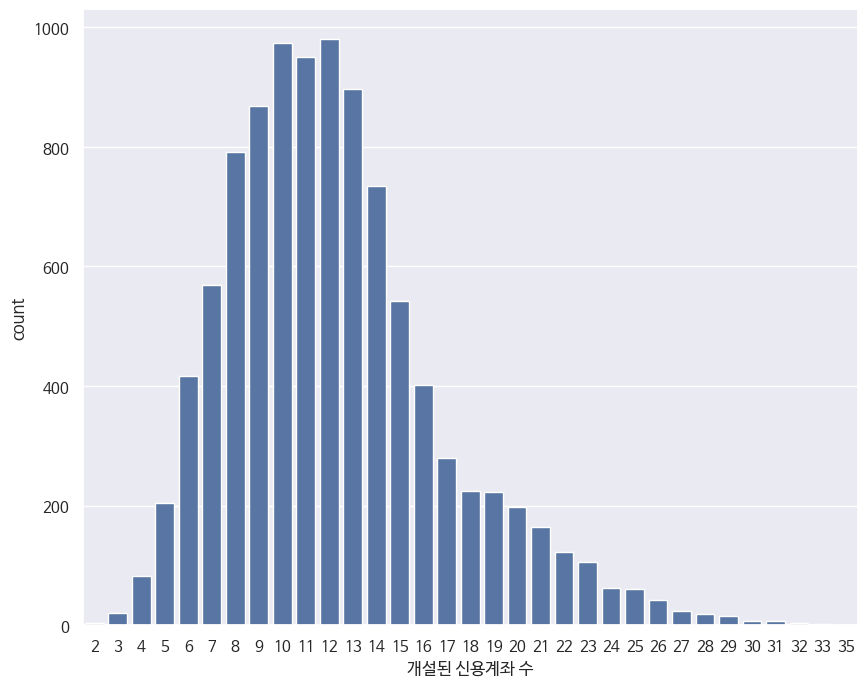

In [184]:
count = train['Í∞úÏÑ§Îêú Ïã†Ïö©Í≥ÑÏ¢å Ïàò'].value_counts().reset_index()
count.columns = ['Í∞úÏÑ§Îêú Ïã†Ïö©Í≥ÑÏ¢å Ïàò','count']

plt.figure(figsize = (10, 8))
sns.barplot(x = 'Í∞úÏÑ§Îêú Ïã†Ïö©Í≥ÑÏ¢å Ïàò',y = 'count', data = count)
plt.xlabel('Í∞úÏÑ§Îêú Ïã†Ïö©Í≥ÑÏ¢å Ïàò')
plt.ylabel('count')
plt.show()

In [ ]:
train['Í∞úÏÑ§Îêú Ïã†Ïö©Í≥ÑÏ¢å Ïàò'].describe()

count    10000.000000
mean        12.248900
std          4.620572
min          2.000000
25%          9.000000
50%         12.000000
75%         15.000000
max         35.000000
Name: Í∞úÏÑ§Îêú Ïã†Ïö©Í≥ÑÏ¢å Ïàò, dtype: float64

In [163]:
train['Í∞úÏÑ§Îêú Ïã†Ïö©Í≥ÑÏ¢å Ïàò'] = train['Í∞úÏÑ§Îêú Ïã†Ïö©Í≥ÑÏ¢å Ïàò'].apply(lambda x : 0 if 2 <= x <= 5
                                                else 1 if 6 <= x <= 10
                                                else 2 if 11 <= x <= 15
                                                else 3 if 16 <= x <= 20
                                                else 4 if 21 <= x <= 29
                                                else 5)
train['Í∞úÏÑ§Îêú Ïã†Ïö©Í≥ÑÏ¢å Ïàò'].value_counts()

Í∞úÏÑ§Îêú Ïã†Ïö©Í≥ÑÏ¢å Ïàò
2    4105
1    3620
3    1326
4     617
0     311
5      21
Name: count, dtype: int64

In [141]:
train['Í∞úÏÑ§Îêú Ïã†Ïö©Í≥ÑÏ¢å Ïàò'].value_counts().sort_index()

Í∞úÏÑ§Îêú Ïã†Ïö©Í≥ÑÏ¢å Ïàò
0     311
1    3620
2    4105
3    1326
4     617
5      21
Name: count, dtype: int64

In [140]:
test['Í∞úÏÑ§Îêú Ïã†Ïö©Í≥ÑÏ¢å Ïàò'] = test['Í∞úÏÑ§Îêú Ïã†Ïö©Í≥ÑÏ¢å Ïàò'].apply(lambda x : 0 if 2 <= x <= 5
                                                else 1 if 6 <= x <= 10
                                                else 2 if 11 <= x <= 15
                                                else 3 if 16 <= x <= 20
                                                else 4 if 21 <= x <= 29
                                                else 5)
test['Í∞úÏÑ§Îêú Ïã†Ïö©Í≥ÑÏ¢å Ïàò'].value_counts()

Í∞úÏÑ§Îêú Ïã†Ïö©Í≥ÑÏ¢å Ïàò
1    838
2    735
3    259
0    137
4     85
5      8
Name: count, dtype: int64

## ***2.3 Ïó∞ÏÜçÌòï Î≥ÄÏàò Ïù¥ÏÉÅÏπò ÌôïÏù∏***
* Ïó∞Í∞Ñ ÏÜåÎìù
* ÏµúÎåÄ Ïã†Ïö©ÌïúÎèÑ
* ÌòÑÏû¨ ÎåÄÏ∂ú ÏûîÏï°
* ÌòÑÏû¨ ÎØ∏ÏÉÅÌôò Ïã†Ïö©Ïï°
* Ïõî ÏÉÅÌôò Î∂ÄÏ±ÑÏï°
* Ïã†Ïö© Ï†êÏàò
* Ïã†Ïö© Í±∞Îûò Ïó∞Ïàò

### ***2.1.1 Ïó∞Í∞Ñ ÏÜåÎìù Ïù¥ÏÉÅÏπò***
üìå Ïù¥ÏÉÅÏπò ÎπÑÏú® 9.08%ÎØ∏ÎßåÏúºÎ°ú Î°úÍ∑∏ Î≥ÄÌôò Î∂àÌïÑÏöî

In [ ]:
q1 = train['Ïó∞Í∞Ñ ÏÜåÎìù'].quantile(0.25)
q3 = train['Ïó∞Í∞Ñ ÏÜåÎìù'].quantile(0.75)
IQR = q3 - q1

lower_bound = q1 - 1.5 * IQR
upper_bound = q3 + 1.5 * IQR

outiler = train[(train['Ïó∞Í∞Ñ ÏÜåÎìù'] < lower_bound) | (train['Ïó∞Í∞Ñ ÏÜåÎìù'] > upper_bound)]
print("Ïó∞Í∞Ñ ÏÜåÎìù Ïù¥ÏÉÅÏπò Í∞úÏàò :", len(outiler))
print('Ïó∞Í∞Ñ ÏÜåÎìù Ïù¥ÏÉÅÏπò ÎπÑÏú® :', (len(outiler) / len(train['Ïó∞Í∞Ñ ÏÜåÎìù'])) * 100 )

Ïó∞Í∞Ñ ÏÜåÎìù Ïù¥ÏÉÅÏπò Í∞úÏàò : 908
Ïó∞Í∞Ñ ÏÜåÎìù Ïù¥ÏÉÅÏπò ÎπÑÏú® : 9.08


### ***2.1.2 ÏµúÎåÄ Ïã†Ïö©ÌïúÎèÑ***
üìå Ïù¥ÏÉÅÏπò ÎπÑÏú® 10.45%Î°ú Î°úÍ∑∏ Î≥ÄÌôò ÌïÑÏöîÏÑ± ÏûàÏùå

In [ ]:
q1 = train['ÏµúÎåÄ Ïã†Ïö©ÌïúÎèÑ'].quantile(0.25)
q3 = train['ÏµúÎåÄ Ïã†Ïö©ÌïúÎèÑ'].quantile(0.75)

IQR = q3 - q1

lower_bound = q1 - 1.5 * IQR
upper_bound = q3 + 1.5 * IQR

ÏµúÎåÄÏã†Ïö©ÌïúÎèÑ_outlier = train[(train['ÏµúÎåÄ Ïã†Ïö©ÌïúÎèÑ'] < lower_bound) | (train['ÏµúÎåÄ Ïã†Ïö©ÌïúÎèÑ'] > upper_bound)]
print('ÏµúÎåÄ Ïã†Ïö©ÌïúÎèÑ Ïù¥ÏÉÅÏπò Í∞úÏàò', len(ÏµúÎåÄÏã†Ïö©ÌïúÎèÑ_outlier))
print('ÏµúÎåÄ Ïã†Ïö©ÌïúÎèÑ Ïù¥ÏÉÅÏπò ÎπÑÏú®', (len(ÏµúÎåÄÏã†Ïö©ÌïúÎèÑ_outlier)/len(train['ÏµúÎåÄ Ïã†Ïö©ÌïúÎèÑ'])) * 100)

ÏµúÎåÄ Ïã†Ïö©ÌïúÎèÑ Ïù¥ÏÉÅÏπò Í∞úÏàò 1045
ÏµúÎåÄ Ïã†Ïö©ÌïúÎèÑ Ïù¥ÏÉÅÏπò ÎπÑÏú® 10.45


### ***2.1.3 ÌòÑÏû¨ ÎåÄÏ∂ú ÏûîÏï°***
üìå Ïù¥ÏÉÅÏπò ÎπÑÏú® 8.77%ÎßåÏúºÎ°ú Î°úÍ∑∏ Î≥ÄÌôò Î∂àÌïÑÏöî

In [ ]:
q1 = train['ÌòÑÏû¨ ÎåÄÏ∂ú ÏûîÏï°'].quantile(0.25)
q3 = train['ÌòÑÏû¨ ÎåÄÏ∂ú ÏûîÏï°'].quantile(0.75)

IQR = q3 - q1

lower_bound = q1 - 1.5 * IQR
upper_bound = q3 + 1.5 * IQR

ÌòÑÏû¨ÎåÄÏ∂úÏûîÏï°_outlier = train[(train['ÌòÑÏû¨ ÎåÄÏ∂ú ÏûîÏï°'] < lower_bound) | (train['ÌòÑÏû¨ ÎåÄÏ∂ú ÏûîÏï°'] > upper_bound)]
print('ÌòÑÏû¨ ÎåÄÏ∂ú ÏûîÏï° Ïù¥ÏÉÅÏπò Í∞úÏàò', len(ÌòÑÏû¨ÎåÄÏ∂úÏûîÏï°_outlier))
print('ÌòÑÏû¨ ÎåÄÏ∂ú ÏûîÏï° Ïù¥ÏÉÅÏπò ÎπÑÏú®', (len(ÌòÑÏû¨ÎåÄÏ∂úÏûîÏï°_outlier)/len(train['ÌòÑÏû¨ ÎåÄÏ∂ú ÏûîÏï°'])) * 100)

ÌòÑÏû¨ ÎåÄÏ∂ú ÏûîÏï° Ïù¥ÏÉÅÏπò Í∞úÏàò 877
ÌòÑÏû¨ ÎåÄÏ∂ú ÏûîÏï° Ïù¥ÏÉÅÏπò ÎπÑÏú® 8.77


### ***2.1.4 ÌòÑÏû¨ ÎØ∏ÏÉÅÌôò Ïã†Ïö©Ïï°***
üìå Ïù¥ÏÉÅÏπò ÎπÑÏú® 6.6%ÏúºÎ°ú Î°úÍ∑∏ Î≥ÄÌôò Î∂àÌïÑÏöî

In [ ]:
q1 = train['ÌòÑÏû¨ ÎØ∏ÏÉÅÌôò Ïã†Ïö©Ïï°'].quantile(0.25)
q3 = train['ÌòÑÏû¨ ÎØ∏ÏÉÅÌôò Ïã†Ïö©Ïï°'].quantile(0.75)

IQR = q3 - q1

lower_bound = q1 - 1.5 * IQR
upper_bound = q3 + 1.5 * IQR

ÌòÑÏû¨ÎØ∏ÏÉÅÌôòÏã†Ïö©Ïï°_outlier = train[(train['ÌòÑÏû¨ ÎØ∏ÏÉÅÌôò Ïã†Ïö©Ïï°'] < lower_bound) | (train['ÌòÑÏû¨ ÎØ∏ÏÉÅÌôò Ïã†Ïö©Ïï°'] > upper_bound)]
print('ÌòÑÏû¨ ÎØ∏ÏÉÅÌôò Ïã†Ïö©Ïï° Ïù¥ÏÉÅÏπò Í∞úÏàò', len(ÌòÑÏû¨ÎØ∏ÏÉÅÌôòÏã†Ïö©Ïï°_outlier))
print('ÌòÑÏû¨ ÎØ∏ÏÉÅÌôò Ïã†Ïö©Ïï° Ïù¥ÏÉÅÏπò ÎπÑÏú®', (len(ÌòÑÏû¨ÎØ∏ÏÉÅÌôòÏã†Ïö©Ïï°_outlier)/len(train['ÌòÑÏû¨ ÎØ∏ÏÉÅÌôò Ïã†Ïö©Ïï°'])) * 100)

ÌòÑÏû¨ ÎØ∏ÏÉÅÌôò Ïã†Ïö©Ïï° Ïù¥ÏÉÅÏπò Í∞úÏàò 660
ÌòÑÏû¨ ÎØ∏ÏÉÅÌôò Ïã†Ïö©Ïï° Ïù¥ÏÉÅÏπò ÎπÑÏú® 6.6000000000000005


### ***2.1.5 Ïõî ÏÉÅÌôò Î∂ÄÏ±ÑÏï°***
üìå Ïù¥ÏÉÅÏπò ÎπÑÏú® 1.99%ÏúºÎ°ú Î°úÍ∑∏ Î≥ÄÌôò Î∂àÌïÑÏöî

In [ ]:
q1 = train['Ïõî ÏÉÅÌôò Î∂ÄÏ±ÑÏï°'].quantile(0.25)
q3 = train['Ïõî ÏÉÅÌôò Î∂ÄÏ±ÑÏï°'].quantile(0.75)

IQR = q3 - q1

lower_bound = q1 - 1.5 * IQR
upper_bound = q3 + 1.5 * IQR

ÏõîÏÉÅÌôòÎ∂ÄÏ±ÑÏï°_outlier = train[(train['Ïõî ÏÉÅÌôò Î∂ÄÏ±ÑÏï°'] < lower_bound) | (train['Ïõî ÏÉÅÌôò Î∂ÄÏ±ÑÏï°'] > upper_bound)]
print('Ïõî ÏÉÅÌôò Î∂ÄÏ±ÑÏï° Ïù¥ÏÉÅÏπò Í∞úÏàò', len(ÏõîÏÉÅÌôòÎ∂ÄÏ±ÑÏï°_outlier))
print('Ïõî ÏÉÅÌôò Î∂ÄÏ±ÑÏï° Ïù¥ÏÉÅÏπò ÎπÑÏú®', (len(ÏõîÏÉÅÌôòÎ∂ÄÏ±ÑÏï°_outlier)/len(train['Ïõî ÏÉÅÌôò Î∂ÄÏ±ÑÏï°'])) * 100)

Ïõî ÏÉÅÌôò Î∂ÄÏ±ÑÏï° Ïù¥ÏÉÅÏπò Í∞úÏàò 199
Ïõî ÏÉÅÌôò Î∂ÄÏ±ÑÏï° Ïù¥ÏÉÅÏπò ÎπÑÏú® 1.9900000000000002


### ***2.1.6 Ïã†Ïö© Ï†êÏàò***
üìå Ïù¥ÏÉÅÏπò ÎπÑÏú® 1.08%ÏúºÎ°ú Î°úÍ∑∏ Î≥ÄÌôò Î∂àÌïÑÏöî

In [ ]:
q1 = train['Ïã†Ïö© Ï†êÏàò'].quantile(0.25)
q3 = train['Ïã†Ïö© Ï†êÏàò'].quantile(0.75)

IQR = q3 - q1

lower_bound = q1 - 1.5 * IQR
upper_bound = q3 + 1.5 * IQR

Ïã†Ïö©Ï†êÏàò_outlier = train[(train['Ïã†Ïö© Ï†êÏàò'] < lower_bound) | (train['Ïã†Ïö© Ï†êÏàò'] > upper_bound)]
print('Ïã†Ïö© Ï†êÏàò Ïù¥ÏÉÅÏπò Í∞úÏàò', len(Ïã†Ïö©Ï†êÏàò_outlier))
print('Ïã†Ïö© Ï†êÏàò Ïù¥ÏÉÅÏπò ÎπÑÏú®', (len(Ïã†Ïö©Ï†êÏàò_outlier)/len(train['Ïã†Ïö© Ï†êÏàò'])) * 100)

Ïã†Ïö© Ï†êÏàò Ïù¥ÏÉÅÏπò Í∞úÏàò 108
Ïã†Ïö© Ï†êÏàò Ïù¥ÏÉÅÏπò ÎπÑÏú® 1.08


### ***2.1.7 Ïã†Ïö© Í±∞Îûò Ïó∞Ïàò***
üìå Ïù¥ÏÉÅÏπò ÎπÑÏú® 1.94%ÏúºÎ°ú Î°úÍ∑∏ Î≥ÄÌôò Î∂àÌïÑÏöî

In [ ]:
q1 = train['Ïã†Ïö© Í±∞Îûò Ïó∞Ïàò'].quantile(0.25)
q3 = train['Ïã†Ïö© Í±∞Îûò Ïó∞Ïàò'].quantile(0.75)

IQR = q3 -q1

lower_bound = q1 - 1.5 * IQR
upper_bound = q3 + 1.5 * IQR

Ïã†Ïö©Í±∞ÎûòÏó∞Ïàò_outlier = train[(train['Ïã†Ïö© Í±∞Îûò Ïó∞Ïàò'] < lower_bound) | (train['Ïã†Ïö© Í±∞Îûò Ïó∞Ïàò'] > upper_bound)]
print("Ïã†Ïö© Í±∞Îûò Ïó∞Ïàò Ïù¥ÏÉÅÏπò Í∞úÏàò :", len(Ïã†Ïö©Í±∞ÎûòÏó∞Ïàò_outlier))
print("Ïã†Ïö© Í±∞Îûò Ïó∞Ïàò Ïù¥ÏÉÅÏπò ÎπÑÏú® :", (len(Ïã†Ïö©Í±∞ÎûòÏó∞Ïàò_outlier) / len(train['Ïã†Ïö© Í±∞Îûò Ïó∞Ïàò'])) * 100)

Ïã†Ïö© Í±∞Îûò Ïó∞Ïàò Ïù¥ÏÉÅÏπò Í∞úÏàò : 194
Ïã†Ïö© Í±∞Îûò Ïó∞Ïàò Ïù¥ÏÉÅÏπò ÎπÑÏú® : 1.94


## ***2.4 Î≥ÄÏàò Ï†úÍ±∞***

üìå UIDÎäî ÏòàÏ∏°Ïóê Î∂àÌïÑÏöîÌïú Î≥ÄÏàòÏù¥ÎØÄÎ°ú Ï†úÍ±∞(trainÏóêÏÑúÎßå Ï†úÍ±∞, testÎäî Ï†úÏ∂úÌï† Îïå Îî∞Î°ú Ï†ÄÏû• ÌõÑ Ï†úÍ±∞)

In [ ]:
train = train.drop('UID', axis = 1)

In [ ]:
train.columns

Index(['Ï£ºÍ±∞ ÌòïÌÉú', 'Ïó∞Í∞Ñ ÏÜåÎìù', 'ÌòÑÏû¨ ÏßÅÏû• Í∑ºÏÜç Ïó∞Ïàò', 'Ï≤¥ÎÇ© ÏÑ∏Í∏à ÏïïÎ•ò ÌöüÏàò', 'Ïã†Ïö© Í±∞Îûò Ïó∞Ïàò', 'ÏµúÎåÄ Ïã†Ïö©ÌïúÎèÑ',
       'Ïã†Ïö© Î¨∏Ï†ú Î∞úÏÉù ÌöüÏàò', 'ÎßàÏßÄÎßâ Ïó∞Ï≤¥ Ïù¥ÌõÑ Í≤ΩÍ≥º Í∞úÏõî Ïàò', 'Í∞úÏù∏ ÌååÏÇ∞ ÌöüÏàò', 'ÎåÄÏ∂ú Î™©Ï†Å', 'ÎåÄÏ∂ú ÏÉÅÌôò Í∏∞Í∞Ñ',
       'ÌòÑÏû¨ ÎåÄÏ∂ú ÏûîÏï°', 'ÌòÑÏû¨ ÎØ∏ÏÉÅÌôò Ïã†Ïö©Ïï°', 'Ïõî ÏÉÅÌôò Î∂ÄÏ±ÑÏï°', 'Ïã†Ïö© Ï†êÏàò', 'Ï±ÑÎ¨¥ Î∂àÏù¥Ìñâ Ïó¨Î∂Ä', 'Ïã†Ïö©Í≥ÑÏ¢åÏàò_Í∑∏Î£π'],
      dtype='object')

### ***2.3.1 ÏÉÅÍ¥ÄÍ≥ÑÏàò ÌôïÏù∏***

üìå ÏÉÅÍ¥ÄÍ¥ÄÍ≥Ñ ÌôïÏù∏   
üìå ÏÉÅÍ¥ÄÍ≥ÑÏàò Ï†àÎåÄÍ∞í 0.8 Ïù¥ÏÉÅÏùÄ Îã§Ï§ë Í≥µÏÑ†ÏÑ± Î¨∏Ï†ú ÌôïÏù∏Ìï† ÌïÑÏöî ÏûàÏùå  
üìå Ìï¥Îãπ Îç∞Ïù¥ÌÑ∞ÏóêÎäî Ï°¥Ïû¨ÌïòÏßÄ ÏïäÏùå

In [ ]:
train.corr()

Ï£ºÍ±∞ ÌòïÌÉú     Ïó∞Í∞Ñ ÏÜåÎìù  ÌòÑÏû¨ ÏßÅÏû• Í∑ºÏÜç Ïó∞Ïàò  Ï≤¥ÎÇ© ÏÑ∏Í∏à ÏïïÎ•ò ÌöüÏàò  Ïã†Ïö© Í±∞Îûò Ïó∞Ïàò  \
Ï£ºÍ±∞ ÌòïÌÉú              1.000000  0.087759     0.000077     0.000042  0.120683   
Ïó∞Í∞Ñ ÏÜåÎìù              0.087759  1.000000     0.096829     0.090106  0.308904   
ÌòÑÏû¨ ÏßÅÏû• Í∑ºÏÜç Ïó∞Ïàò        0.000077  0.096829     1.000000    -0.002129  0.110810   
Ï≤¥ÎÇ© ÏÑ∏Í∏à ÏïïÎ•ò ÌöüÏàò        0.000042  0.090106    -0.002129     1.000000  0.090488   
Ïã†Ïö© Í±∞Îûò Ïó∞Ïàò           0.120683  0.308904     0.110810     0.090488  1.000000   
ÏµúÎåÄ Ïã†Ïö©ÌïúÎèÑ            0.073629  0.377923     0.055164    -0.031614  0.275284   
Ïã†Ïö© Î¨∏Ï†ú Î∞úÏÉù ÌöüÏàò       -0.037750  0.055681     0.025862     0.510265  0.128106   
ÎßàÏßÄÎßâ Ïó∞Ï≤¥ Ïù¥ÌõÑ Í≤ΩÍ≥º Í∞úÏõî Ïàò -0.116934 -0.065386     0.002687     0.132386 -0.048344   
Í∞úÏù∏ ÌååÏÇ∞ ÌöüÏàò          -0.044068 -0.017336     0.016512     0.225035  0.133616   
ÎåÄÏ∂ú Î™©Ï†Å              0.136576  0.074023     0.006386     0.151167  0.099616   
ÎåÄÏ∂ú ÏÉÅÌôò Í∏∞Í∞Ñ          -0.160809 -0.109321     0.092884     0.024957  0.004799   
ÌòÑÏû¨ ÎåÄÏ∂ú ÏûîÏï°           0.116814  0.403319     0.043669     0.109320  0.233531   
ÌòÑÏû¨ ÎØ∏ÏÉÅÌôò Ïã†Ïö©Ïï°         0.001423  0.336916     0.048816    -0.069903  0.186893   
Ïõî ÏÉÅÌôò Î∂ÄÏ±ÑÏï°           0.049927  0.416631     0.097235     0.022609  0.232618   
Ïã†Ïö© Ï†êÏàò             -0.123679  0.045491     0.116151    -0.007147  0.116424   
Ï±ÑÎ¨¥ Î∂àÏù¥Ìñâ Ïó¨Î∂Ä         -0.062514 -0.120499    -0.043089    -0.030419 -0.108856   
Ïã†Ïö©Í≥ÑÏ¢åÏàò_Í∑∏Î£π           0.027898  0.082269     0.036957    -0.031184  0.060029   

                    ÏµúÎåÄ Ïã†Ïö©ÌïúÎèÑ  Ïã†Ïö© Î¨∏Ï†ú Î∞úÏÉù ÌöüÏàò  ÎßàÏßÄÎßâ Ïó∞Ï≤¥ Ïù¥ÌõÑ Í≤ΩÍ≥º Í∞úÏõî Ïàò  Í∞úÏù∏ ÌååÏÇ∞ ÌöüÏàò  \
Ï£ºÍ±∞ ÌòïÌÉú              0.073629    -0.037750          -0.116934 -0.044068   
Ïó∞Í∞Ñ ÏÜåÎìù              0.377923     0.055681          -0.065386 -0.017336   
ÌòÑÏû¨ ÏßÅÏû• Í∑ºÏÜç Ïó∞Ïàò        0.055164     0.025862           0.002687  0.016512   
Ï≤¥ÎÇ© ÏÑ∏Í∏à ÏïïÎ•ò ÌöüÏàò       -0.031614     0.510265           0.132386  0.225035   
Ïã†Ïö© Í±∞Îûò Ïó∞Ïàò           0.275284     0.128106          -0.048344  0.133616   
ÏµúÎåÄ Ïã†Ïö©ÌïúÎèÑ            1.000000    -0.092891          -0.119547 -0.116278   
Ïã†Ïö© Î¨∏Ï†ú Î∞úÏÉù ÌöüÏàò       -0.092891     1.000000           0.227206  0.600116   
ÎßàÏßÄÎßâ Ïó∞Ï≤¥ Ïù¥ÌõÑ Í≤ΩÍ≥º Í∞úÏõî Ïàò -0.119547     0.227206           1.000000  0.243908   
Í∞úÏù∏ ÌååÏÇ∞ ÌöüÏàò          -0.116278     0.600116           0.243908  1.000000   
ÎåÄÏ∂ú Î™©Ï†Å              0.011430     0.074505           0.000347 -0.053855   
ÎåÄÏ∂ú ÏÉÅÌôò Í∏∞Í∞Ñ          -0.110728     0.110826           0.173601  0.128475   
ÌòÑÏû¨ ÎåÄÏ∂ú ÏûîÏï°           0.361259     0.017065          -0.144126 -0.085709   
ÌòÑÏû¨ ÎØ∏ÏÉÅÌôò Ïã†Ïö©Ïï°         0.392104    -0.093040          -0.100230 -0.082009   
Ïõî ÏÉÅÌôò Î∂ÄÏ±ÑÏï°           0.379351    -0.024605          -0.117031 -0.065000   
Ïã†Ïö© Ï†êÏàò              0.049756     0.065530           0.112091  0.093226   
Ï±ÑÎ¨¥ Î∂àÏù¥Ìñâ Ïó¨Î∂Ä         -0.044997     0.044847          -0.012058  0.115900   
Ïã†Ïö©Í≥ÑÏ¢åÏàò_Í∑∏Î£π           0.099798    -0.083053          -0.043745 -0.091497   

                      ÎåÄÏ∂ú Î™©Ï†Å  ÎåÄÏ∂ú ÏÉÅÌôò Í∏∞Í∞Ñ  ÌòÑÏû¨ ÎåÄÏ∂ú ÏûîÏï°  ÌòÑÏû¨ ÎØ∏ÏÉÅÌôò Ïã†Ïö©Ïï°  Ïõî ÏÉÅÌôò Î∂ÄÏ±ÑÏï°  \
Ï£ºÍ±∞ ÌòïÌÉú              0.136576 -0.160809  0.116814    0.001423  0.049927   
Ïó∞Í∞Ñ ÏÜåÎìù              0.074023 -0.109321  0.403319    0.336916  0.416631   
ÌòÑÏû¨ ÏßÅÏû• Í∑ºÏÜç Ïó∞Ïàò        0.006386  0.092884  0.043669    0.048816  0.097235   
Ï≤¥ÎÇ© ÏÑ∏Í∏à ÏïïÎ•ò ÌöüÏàò        0.151167  0.024957  0.109320   -0.069903  0.022609   
Ïã†Ïö© Í±∞Îûò Ïó∞Ïàò           0.099616  0.004799  0.233531    0.186893  0.232618   
ÏµúÎåÄ Ïã†Ïö©ÌïúÎèÑ            0.011430 -0.110728  0.361259    0.392104  0.379351   
Ïã†Ïö© Î¨∏Ï†ú Î∞úÏÉù ÌöüÏàò        0.074505  0.110826  0.017065   -0.093040 -0.024605   
ÎßàÏßÄÎßâ Ïó∞Ï≤¥ Ïù¥ÌõÑ 

### ***2.3.2 Ï§ëÏöî Î≥ÄÏàò ÌôïÏù∏(ÎûúÎç§Ìè¨Î†àÏä§Ìä∏)***
üìå Ïñ¥Îñ§ Î≥ÄÏàòÎ•º Ï†úÍ±∞Ìï¥Ïïº Ìï†ÏßÄ Í∞êÏù¥ Ïïà Ïû°ÌòÄÏÑú ÎûúÎç§Ìè¨Î†àÏä§Ìä∏Î°ú Î≥ÄÏàò Ï§ëÏöîÎèÑ ÌôïÏù∏  
üìå ÏùºÎ∞òÏ†ÅÏúºÎ°ú 0.01 Ïù¥ÌïòÏù¥Î©¥ ÏùòÎØ∏Í∞Ä ÎÇÆÏïÑ Ï†úÍ±∞ Í∞ÄÎä•

In [ ]:
# ÎèÖÎ¶ΩÎ≥ÄÏàò, Ï¢ÖÏÜçÎ≥ÄÏàò Î∂ÑÌï†

feature = ['Ï£ºÍ±∞ ÌòïÌÉú', 'Ïó∞Í∞Ñ ÏÜåÎìù', 'ÌòÑÏû¨ ÏßÅÏû• Í∑ºÏÜç Ïó∞Ïàò', 'Ï≤¥ÎÇ© ÏÑ∏Í∏à ÏïïÎ•ò ÌöüÏàò', 'Ïã†Ïö© Í±∞Îûò Ïó∞Ïàò', 'ÏµúÎåÄ Ïã†Ïö©ÌïúÎèÑ',
       'Ïã†Ïö© Î¨∏Ï†ú Î∞úÏÉù ÌöüÏàò', 'ÎßàÏßÄÎßâ Ïó∞Ï≤¥ Ïù¥ÌõÑ Í≤ΩÍ≥º Í∞úÏõî Ïàò', 'Í∞úÏù∏ ÌååÏÇ∞ ÌöüÏàò', 'ÎåÄÏ∂ú Î™©Ï†Å', 'ÎåÄÏ∂ú ÏÉÅÌôò Í∏∞Í∞Ñ',
       'ÌòÑÏû¨ ÎåÄÏ∂ú ÏûîÏï°', 'ÌòÑÏû¨ ÎØ∏ÏÉÅÌôò Ïã†Ïö©Ïï°', 'Ïõî ÏÉÅÌôò Î∂ÄÏ±ÑÏï°', 'Ïã†Ïö© Ï†êÏàò', 'Ïã†Ïö©Í≥ÑÏ¢åÏàò_Í∑∏Î£π']
X = train[feature]
y = train['Ï±ÑÎ¨¥ Î∂àÏù¥Ìñâ Ïó¨Î∂Ä']


from sklearn.model_selection import train_test_split

# train, val Îç∞Ïù¥ÌÑ∞ Î∂ÑÌï†
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size = 0.2, random_state = 42)

from sklearn.ensemble import RandomForestClassifier

# Î™®Îç∏ Î∂àÎü¨Ïò§Í∏∞
model = RandomForestClassifier()

# Î™®Îç∏ ÌïôÏäµ
model.fit(X_train, y_train)

# Î≥ÄÏàò Ï§ëÏöîÎèÑ Ï∂îÏ∂ú
importances = model.feature_importances_

# Îç∞Ïù¥ÌÑ∞ ÌîÑÎ†àÏûÑÏúºÎ°ú Ï†ïÎ†¨
import pandas as pd
feature_importance_df = pd.DataFrame({'Feature' : X_train.columns, 'Importance' : importances})

# Ï§ëÏöîÎèÑ ÏàúÏúºÎ°ú Ï†ïÎ†¨
feature_importance_df = feature_importance_df.sort_values(by = 'Importance', ascending = False)

# Ï∂úÎ†•
feature_importance_df


Feature  Importance
1               Ïó∞Í∞Ñ ÏÜåÎìù    0.112534
12         ÌòÑÏû¨ ÎØ∏ÏÉÅÌôò Ïã†Ïö©Ïï°    0.105708
11           ÌòÑÏû¨ ÎåÄÏ∂ú ÏûîÏï°    0.105646
14              Ïã†Ïö© Ï†êÏàò    0.093991
4            Ïã†Ïö© Í±∞Îûò Ïó∞Ïàò    0.093660
5             ÏµúÎåÄ Ïã†Ïö©ÌïúÎèÑ    0.093032
13           Ïõî ÏÉÅÌôò Î∂ÄÏ±ÑÏï°    0.091000
7   ÎßàÏßÄÎßâ Ïó∞Ï≤¥ Ïù¥ÌõÑ Í≤ΩÍ≥º Í∞úÏõî Ïàò    0.085752
15           Ïã†Ïö©Í≥ÑÏ¢åÏàò_Í∑∏Î£π    0.049488
2         ÌòÑÏû¨ ÏßÅÏû• Í∑ºÏÜç Ïó∞Ïàò    0.044275
9               ÎåÄÏ∂ú Î™©Ï†Å    0.031664
6         Ïã†Ïö© Î¨∏Ï†ú Î∞úÏÉù ÌöüÏàò    0.026098
0               Ï£ºÍ±∞ ÌòïÌÉú    0.022936
8            Í∞úÏù∏ ÌååÏÇ∞ ÌöüÏàò    0.017748
10           ÎåÄÏ∂ú ÏÉÅÌôò Í∏∞Í∞Ñ    0.017274
3         Ï≤¥ÎÇ© ÏÑ∏Í∏à ÏïïÎ•ò ÌöüÏàò    0.009195

### ***2.3.3 Ï§ëÏöî Î≥ÄÏàò ÌôïÏù∏(Permutation Importance:ÏàúÏó¥ Ï§ëÏöîÎèÑ)***
üìå 0.001 Ïù¥ÌïòÎäî ÏòÅÌñ•Ïù¥ Í±∞Ïùò ÏóÜÎäî Î≥ÄÏàòÎ°ú Î≥ÄÏàò Ï†úÍ±∞ ÌõÑÎ≥¥  
üìå 0.001 Ïù¥Ìïò Î≥ÄÏàò : Ï£ºÍ±∞ ÌòïÌÉú, Ï≤¥ÎÇ© ÏÑ∏Í∏â ÏïïÎ•ò ÌöüÏàò, Ïõî ÏÉÅÌôò Î∂ÄÏ±ÑÏï°

In [ ]:
from sklearn.inspection import permutation_importance

result = permutation_importance(model, X_val, y_val, n_repeats = 10, random_state = 42)

perm_importance_df = pd.DataFrame({'Feature' : X_val.columns,
                                   'Importance' : result.importances_mean}).sort_values(by = 'Importance', ascending = False)
perm_importance_df

Feature  Importance
1               Ïó∞Í∞Ñ ÏÜåÎìù     0.02855
9               ÎåÄÏ∂ú Î™©Ï†Å     0.01450
12         ÌòÑÏû¨ ÎØ∏ÏÉÅÌôò Ïã†Ïö©Ïï°     0.01190
8            Í∞úÏù∏ ÌååÏÇ∞ ÌöüÏàò     0.01015
15           Ïã†Ïö©Í≥ÑÏ¢åÏàò_Í∑∏Î£π     0.00915
14              Ïã†Ïö© Ï†êÏàò     0.00885
6         Ïã†Ïö© Î¨∏Ï†ú Î∞úÏÉù ÌöüÏàò     0.00495
10           ÎåÄÏ∂ú ÏÉÅÌôò Í∏∞Í∞Ñ     0.00440
2         ÌòÑÏû¨ ÏßÅÏû• Í∑ºÏÜç Ïó∞Ïàò     0.00265
11           ÌòÑÏû¨ ÎåÄÏ∂ú ÏûîÏï°     0.00245
0               Ï£ºÍ±∞ ÌòïÌÉú     0.00080
7   ÎßàÏßÄÎßâ Ïó∞Ï≤¥ Ïù¥ÌõÑ Í≤ΩÍ≥º Í∞úÏõî Ïàò     0.00065
5             ÏµúÎåÄ Ïã†Ïö©ÌïúÎèÑ    -0.00065
4            Ïã†Ïö© Í±∞Îûò Ïó∞Ïàò    -0.00100
3         Ï≤¥ÎÇ© ÏÑ∏Í∏à ÏïïÎ•ò ÌöüÏàò    -0.00130
13           Ïõî ÏÉÅÌôò Î∂ÄÏ±ÑÏï°    -0.00345

### ***2.2.4 Ï§ëÏöî Î≥ÄÏàò ÌôïÏù∏(VIF:Îã§Ï§ëÍ≥µÏÑ†ÏÑ±ÌôïÏù∏,Ï§ëÎ≥µÎêú Ï†ïÎ≥¥ Ï†úÍ±∞)***
üìå 10Ïù¥ÏÉÅÏùÄ Îã§Ï§ëÍ≥µÏÑ†ÏÑ± Îß§Ïö∞ ÎÜíÏúºÎØÄÎ°ú Ï†úÍ±∞ ÌïÑÏöî ÏûàÏùå  
üìå 5 ~ 10 Îã§Î•∏ Î≥ÄÏàòÏôÄ ÏÉÅÍ¥ÄÍ¥ÄÍ≥Ñ ÎÜíÏúºÎØÄÎ°ú Ï£ºÏùò ÌïÑÏöî  
üìå 10Ïù¥ÏÉÅ Î≥ÄÏàò : Ïã†Ïö© Í±∞Îûò Ïó∞Ïàò, Ïã†Ïö© Ï†êÏàò  
üìå 5 ~ 10 Î≥ÄÏàò : Í∞úÏÑ§Îêú Ïã†Ïö©Í≥ÑÏ¢å Ïàò, ÌòÑÏû¨ ÎåÄÏ∂ú ÏûîÏï°

In [ ]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
import pandas as pd

vif_data = pd.DataFrame()
vif_data['Feature'] = X_train.columns
vif_data['VIF'] = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]

print(vif_data)

              Feature        VIF
0               Ï£ºÍ±∞ ÌòïÌÉú   2.223023
1               Ïó∞Í∞Ñ ÏÜåÎìù   4.858645
2         ÌòÑÏû¨ ÏßÅÏû• Í∑ºÏÜç Ïó∞Ïàò   4.508687
3         Ï≤¥ÎÇ© ÏÑ∏Í∏à ÏïïÎ•ò ÌöüÏàò   1.511220
4            Ïã†Ïö© Í±∞Îûò Ïó∞Ïàò  10.761100
5             ÏµúÎåÄ Ïã†Ïö©ÌïúÎèÑ   2.186885
6         Ïã†Ïö© Î¨∏Ï†ú Î∞úÏÉù ÌöüÏàò   2.600933
7   ÎßàÏßÄÎßâ Ïó∞Ï≤¥ Ïù¥ÌõÑ Í≤ΩÍ≥º Í∞úÏõî Ïàò   3.750980
8            Í∞úÏù∏ ÌååÏÇ∞ ÌöüÏàò   2.015884
9               ÎåÄÏ∂ú Î™©Ï†Å   1.510017
10           ÎåÄÏ∂ú ÏÉÅÌôò Í∏∞Í∞Ñ   4.485094
11           ÌòÑÏû¨ ÎåÄÏ∂ú ÏûîÏï°   6.269506
12         ÌòÑÏû¨ ÎØ∏ÏÉÅÌôò Ïã†Ïö©Ïï°   2.835868
13           Ïõî ÏÉÅÌôò Î∂ÄÏ±ÑÏï°   4.546329
14              Ïã†Ïö© Ï†êÏàò  24.076448
15           Ïã†Ïö©Í≥ÑÏ¢åÏàò_Í∑∏Î£π   3.870831


### 2.2.5 Ï§ëÏöîÎèÑ, VIF ÎπÑÍµê
üìå Ï≤¥ÎÇ© ÏÑ∏Í∏à ÏïïÎ•ò ÌöüÏàò, Ï£ºÍ±∞ ÌòïÌÉú Ï†úÍ±∞  
üìå ÏµúÎåÄ Ïã†Ïö©ÌïúÎèÑ, Ïõî ÏÉÅÌôò Î∂ÄÏ±ÑÏï°, Ïã†Ïö© Í±∞Îûò Ïó∞Ïàò, Ïã†Ïö©Ï†êÏàò Í≤ÄÌÜ† ÌïÑÏöî -> ÎûúÎç§ Ìè¨Î†àÏä§Ìä∏Î°ú Ìï¥Îãπ Î≥ÄÏàò Ïó¨Î∂ÄÎ°ú ÏÑ±Îä• ÎπÑÍµê  
üìå Ïã†Ïö© Í±∞Îûò Ïó∞Ïàò, Ïã†Ïö©Ï†êÏàò Í≤ÄÌÜ† ÌïÑÏöî -> Îëê Î≥ÄÏàò ÏÉÅÍ¥ÄÍ≥ÑÏàò ÌôïÏù∏

#### ***2.2.5.1 ÏµúÎåÄ Ïã†Ïö©ÌïúÎèÑ***
üìå 0.6995 Ï†ïÌôïÎèÑÏóêÏÑú Î≥ÄÏàò ÏÇ≠Ï†ú ÌõÑ 0.687Î°ú Í∞êÏÜå -> Ìï¥Îãπ Î≥ÄÏàò Ïú†ÏßÄ

In [ ]:
train.columns

Index(['Ï£ºÍ±∞ ÌòïÌÉú', 'Ïó∞Í∞Ñ ÏÜåÎìù', 'ÌòÑÏû¨ ÏßÅÏû• Í∑ºÏÜç Ïó∞Ïàò', 'Ï≤¥ÎÇ© ÏÑ∏Í∏à ÏïïÎ•ò ÌöüÏàò', 'Ïã†Ïö© Í±∞Îûò Ïó∞Ïàò', 'ÏµúÎåÄ Ïã†Ïö©ÌïúÎèÑ',
       'Ïã†Ïö© Î¨∏Ï†ú Î∞úÏÉù ÌöüÏàò', 'ÎßàÏßÄÎßâ Ïó∞Ï≤¥ Ïù¥ÌõÑ Í≤ΩÍ≥º Í∞úÏõî Ïàò', 'Í∞úÏù∏ ÌååÏÇ∞ ÌöüÏàò', 'ÎåÄÏ∂ú Î™©Ï†Å', 'ÎåÄÏ∂ú ÏÉÅÌôò Í∏∞Í∞Ñ',
       'ÌòÑÏû¨ ÎåÄÏ∂ú ÏûîÏï°', 'ÌòÑÏû¨ ÎØ∏ÏÉÅÌôò Ïã†Ïö©Ïï°', 'Ïõî ÏÉÅÌôò Î∂ÄÏ±ÑÏï°', 'Ïã†Ïö© Ï†êÏàò', 'Ï±ÑÎ¨¥ Î∂àÏù¥Ìñâ Ïó¨Î∂Ä', 'Ïã†Ïö©Í≥ÑÏ¢åÏàò_Í∑∏Î£π'],
      dtype='object')

In [ ]:
# Ïõî ÏÉÅÌôò Î∂ÄÏ±ÑÏï° Î≥ÄÏàò Ìè¨Ìï® Î™®Îç∏

feature = ['Ï£ºÍ±∞ ÌòïÌÉú', 'Ïó∞Í∞Ñ ÏÜåÎìù', 'ÌòÑÏû¨ ÏßÅÏû• Í∑ºÏÜç Ïó∞Ïàò', 'Ï≤¥ÎÇ© ÏÑ∏Í∏à ÏïïÎ•ò ÌöüÏàò', 'Ïã†Ïö© Í±∞Îûò Ïó∞Ïàò', 'ÏµúÎåÄ Ïã†Ïö©ÌïúÎèÑ',
       'Ïã†Ïö© Î¨∏Ï†ú Î∞úÏÉù ÌöüÏàò', 'ÎßàÏßÄÎßâ Ïó∞Ï≤¥ Ïù¥ÌõÑ Í≤ΩÍ≥º Í∞úÏõî Ïàò', 'Í∞úÏù∏ ÌååÏÇ∞ ÌöüÏàò', 'ÎåÄÏ∂ú Î™©Ï†Å', 'ÎåÄÏ∂ú ÏÉÅÌôò Í∏∞Í∞Ñ',
       'ÌòÑÏû¨ ÎåÄÏ∂ú ÏûîÏï°', 'ÌòÑÏû¨ ÎØ∏ÏÉÅÌôò Ïã†Ïö©Ïï°', 'Ïõî ÏÉÅÌôò Î∂ÄÏ±ÑÏï°', 'Ïã†Ïö© Ï†êÏàò', 'Ïã†Ïö©Í≥ÑÏ¢åÏàò_Í∑∏Î£π']

X = train[feature]
y = train['Ï±ÑÎ¨¥ Î∂àÏù¥Ìñâ Ïó¨Î∂Ä']

from sklearn.model_selection import train_test_split
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size = 0.2, random_state = 42)

# Î™®Îç∏ Î∂àÎü¨Ïò§Í∏∞
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier()

model.fit(X_train, y_train)

y_pred = model.predict(X_val)

#Ï†ïÌôïÎèÑ ÌèâÍ∞Ä
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(y_val, y_pred)
accuracy

0.6995

In [ ]:
# ÏµúÎåÄ Ïã†Ïö©ÌïúÎèÑ Î≥ÄÏàò Ï†úÍ±∞ Î™®Îç∏

feature = ['Ï£ºÍ±∞ ÌòïÌÉú', 'Ïó∞Í∞Ñ ÏÜåÎìù', 'ÌòÑÏû¨ ÏßÅÏû• Í∑ºÏÜç Ïó∞Ïàò', 'Ï≤¥ÎÇ© ÏÑ∏Í∏à ÏïïÎ•ò ÌöüÏàò', 'Ïã†Ïö© Í±∞Îûò Ïó∞Ïàò',
       'Ïã†Ïö© Î¨∏Ï†ú Î∞úÏÉù ÌöüÏàò', 'ÎßàÏßÄÎßâ Ïó∞Ï≤¥ Ïù¥ÌõÑ Í≤ΩÍ≥º Í∞úÏõî Ïàò', 'Í∞úÏù∏ ÌååÏÇ∞ ÌöüÏàò', 'ÎåÄÏ∂ú Î™©Ï†Å', 'ÎåÄÏ∂ú ÏÉÅÌôò Í∏∞Í∞Ñ',
       'ÌòÑÏû¨ ÎåÄÏ∂ú ÏûîÏï°', 'ÌòÑÏû¨ ÎØ∏ÏÉÅÌôò Ïã†Ïö©Ïï°', 'Ïõî ÏÉÅÌôò Î∂ÄÏ±ÑÏï°', 'Ïã†Ïö© Ï†êÏàò', 'Ïã†Ïö©Í≥ÑÏ¢åÏàò_Í∑∏Î£π']

X = train[feature]
y = train['Ï±ÑÎ¨¥ Î∂àÏù¥Ìñâ Ïó¨Î∂Ä']

from sklearn.model_selection import train_test_split
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size = 0.2, random_state = 42)

# Î™®Îç∏ Î∂àÎü¨Ïò§Í∏∞
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier()

model.fit(X_train, y_train)

y_pred = model.predict(X_val)

#Ï†ïÌôïÎèÑ ÌèâÍ∞Ä
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(y_val, y_pred)
accuracy

0.687

#### ***2.2.5.2 Ïõî ÏÉÅÌôò Î∂ÄÏ±ÑÏï°***
üìå 0.6995 Ï†ïÌôïÎèÑÏóêÏÑú Î≥ÄÏàò ÏÇ≠Ï†ú ÌõÑ 0.695Î°ú Í∞êÏÜå -> Ìï¥Îãπ Î≥ÄÏàò Ïú†ÏßÄ

In [ ]:
# Ïõî ÏÉÅÌôò Î∂ÄÏ±ÑÏï° Î≥ÄÏàò Ï†úÍ±∞ Î™®Îç∏

feature = ['Ï£ºÍ±∞ ÌòïÌÉú', 'Ïó∞Í∞Ñ ÏÜåÎìù', 'ÌòÑÏû¨ ÏßÅÏû• Í∑ºÏÜç Ïó∞Ïàò', 'Ï≤¥ÎÇ© ÏÑ∏Í∏à ÏïïÎ•ò ÌöüÏàò', 'Ïã†Ïö© Í±∞Îûò Ïó∞Ïàò', 'ÏµúÎåÄ Ïã†Ïö©ÌïúÎèÑ',
       'Ïã†Ïö© Î¨∏Ï†ú Î∞úÏÉù ÌöüÏàò', 'ÎßàÏßÄÎßâ Ïó∞Ï≤¥ Ïù¥ÌõÑ Í≤ΩÍ≥º Í∞úÏõî Ïàò', 'Í∞úÏù∏ ÌååÏÇ∞ ÌöüÏàò', 'ÎåÄÏ∂ú Î™©Ï†Å', 'ÎåÄÏ∂ú ÏÉÅÌôò Í∏∞Í∞Ñ',
       'ÌòÑÏû¨ ÎåÄÏ∂ú ÏûîÏï°', 'ÌòÑÏû¨ ÎØ∏ÏÉÅÌôò Ïã†Ïö©Ïï°', 'Ïã†Ïö© Ï†êÏàò', 'Ïã†Ïö©Í≥ÑÏ¢åÏàò_Í∑∏Î£π']

X = train[feature]
y = train['Ï±ÑÎ¨¥ Î∂àÏù¥Ìñâ Ïó¨Î∂Ä']

from sklearn.model_selection import train_test_split
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size = 0.2, random_state = 42)

# Î™®Îç∏ Î∂àÎü¨Ïò§Í∏∞
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier()

model.fit(X_train, y_train)

y_pred = model.predict(X_val)

#Ï†ïÌôïÎèÑ ÌèâÍ∞Ä
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(y_val, y_pred)
accuracy

0.695

#### ***2.2.5.3 Ïã†Ïö© Í±∞Îûò Ïó∞Ïàò***
üìå 0.6995 Ï†ïÌôïÎèÑÏóêÏÑú Î≥ÄÏàò ÏÇ≠Ï†ú ÌõÑ 0.702Î°ú Ï¶ùÍ∞Ä -> Ìï¥Îãπ Î≥ÄÏàò Ï†úÍ±∞

In [ ]:
# Ïã†Ïö© Í±∞Îûò Ïó∞Ïàò Î≥ÄÏàò Ï†úÍ±∞ Î™®Îç∏

feature = ['Ï£ºÍ±∞ ÌòïÌÉú', 'Ïó∞Í∞Ñ ÏÜåÎìù', 'ÌòÑÏû¨ ÏßÅÏû• Í∑ºÏÜç Ïó∞Ïàò', 'Ï≤¥ÎÇ© ÏÑ∏Í∏à ÏïïÎ•ò ÌöüÏàò', 'ÏµúÎåÄ Ïã†Ïö©ÌïúÎèÑ',
       'Ïã†Ïö© Î¨∏Ï†ú Î∞úÏÉù ÌöüÏàò', 'ÎßàÏßÄÎßâ Ïó∞Ï≤¥ Ïù¥ÌõÑ Í≤ΩÍ≥º Í∞úÏõî Ïàò', 'Í∞úÏù∏ ÌååÏÇ∞ ÌöüÏàò', 'ÎåÄÏ∂ú Î™©Ï†Å', 'ÎåÄÏ∂ú ÏÉÅÌôò Í∏∞Í∞Ñ',
       'ÌòÑÏû¨ ÎåÄÏ∂ú ÏûîÏï°', 'ÌòÑÏû¨ ÎØ∏ÏÉÅÌôò Ïã†Ïö©Ïï°', 'Ïõî ÏÉÅÌôò Î∂ÄÏ±ÑÏï°', 'Ïã†Ïö© Ï†êÏàò', 'Ïã†Ïö©Í≥ÑÏ¢åÏàò_Í∑∏Î£π']

X = train[feature]
y = train['Ï±ÑÎ¨¥ Î∂àÏù¥Ìñâ Ïó¨Î∂Ä']

from sklearn.model_selection import train_test_split
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size = 0.2, random_state = 42)

# Î™®Îç∏ Î∂àÎü¨Ïò§Í∏∞
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier()

model.fit(X_train, y_train)

y_pred = model.predict(X_val)

#Ï†ïÌôïÎèÑ ÌèâÍ∞Ä
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(y_val, y_pred)
accuracy

0.702

#### ***2.2.5.4 Ïã†Ïö© Ï†êÏàò***
üìå 0.6995 Ï†ïÌôïÎèÑÏóêÏÑú Î≥ÄÏàò ÏÇ≠Ï†ú ÌõÑ 0.689Î°ú Í∞êÏÜå -> Ìï¥Îãπ Î≥ÄÏàò Ïú†ÏßÄ

In [ ]:
# Ïã†Ïö© Ï†êÏàò Î≥ÄÏàò Ï†úÍ±∞ Î™®Îç∏

feature = ['Ï£ºÍ±∞ ÌòïÌÉú', 'Ïó∞Í∞Ñ ÏÜåÎìù', 'ÌòÑÏû¨ ÏßÅÏû• Í∑ºÏÜç Ïó∞Ïàò', 'Ï≤¥ÎÇ© ÏÑ∏Í∏à ÏïïÎ•ò ÌöüÏàò', 'Ïã†Ïö© Í±∞Îûò Ïó∞Ïàò', 'ÏµúÎåÄ Ïã†Ïö©ÌïúÎèÑ',
       'Ïã†Ïö© Î¨∏Ï†ú Î∞úÏÉù ÌöüÏàò', 'ÎßàÏßÄÎßâ Ïó∞Ï≤¥ Ïù¥ÌõÑ Í≤ΩÍ≥º Í∞úÏõî Ïàò', 'Í∞úÏù∏ ÌååÏÇ∞ ÌöüÏàò', 'ÎåÄÏ∂ú Î™©Ï†Å', 'ÎåÄÏ∂ú ÏÉÅÌôò Í∏∞Í∞Ñ',
       'ÌòÑÏû¨ ÎåÄÏ∂ú ÏûîÏï°', 'ÌòÑÏû¨ ÎØ∏ÏÉÅÌôò Ïã†Ïö©Ïï°', 'Ïõî ÏÉÅÌôò Î∂ÄÏ±ÑÏï°', 'Ïã†Ïö©Í≥ÑÏ¢åÏàò_Í∑∏Î£π']

X = train[feature]
y = train['Ï±ÑÎ¨¥ Î∂àÏù¥Ìñâ Ïó¨Î∂Ä']

from sklearn.model_selection import train_test_split
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size = 0.2, random_state = 42)

# Î™®Îç∏ Î∂àÎü¨Ïò§Í∏∞
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier()

model.fit(X_train, y_train)
y_pred = model.predict(X_val)

#Ï†ïÌôïÎèÑ ÌèâÍ∞Ä
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(y_val, y_pred)
accuracy

0.689

In [ ]:
train = train.drop(['Ïã†Ïö© Í±∞Îûò Ïó∞Ïàò', 'Ï≤¥ÎÇ© ÏÑ∏Í∏à ÏïïÎ•ò ÌöüÏàò', 'Ï£ºÍ±∞ ÌòïÌÉú'], axis = 1)

In [ ]:
test = test.drop(['Ïã†Ïö© Í±∞Îûò Ïó∞Ïàò', 'Ï≤¥ÎÇ© ÏÑ∏Í∏à ÏïïÎ•ò ÌöüÏàò', 'Ï£ºÍ±∞ ÌòïÌÉú'], axis = 1)

In [ ]:
train.shape

(10000, 14)

In [ ]:
test.shape

(2062, 14)

In [ ]:
train.head()

Ïó∞Í∞Ñ ÏÜåÎìù  ÌòÑÏû¨ ÏßÅÏû• Í∑ºÏÜç Ïó∞Ïàò   ÏµúÎåÄ Ïã†Ïö©ÌïúÎèÑ  Ïã†Ïö© Î¨∏Ï†ú Î∞úÏÉù ÌöüÏàò  ÎßàÏßÄÎßâ Ïó∞Ï≤¥ Ïù¥ÌõÑ Í≤ΩÍ≥º Í∞úÏõî Ïàò  Í∞úÏù∏ ÌååÏÇ∞ ÌöüÏàò  \
0  1941337.5           10  400597.5            0                 24         1   
1  1979505.0           10  360679.5            0                 11         0   
2  1356381.0            4  491770.5            1                 74         3   
3  1049017.5            6  411546.0            1                 22         1   
4  4320217.5            2  895288.5            0                 32         0   

   ÎåÄÏ∂ú Î™©Ï†Å  ÎåÄÏ∂ú ÏÉÅÌôò Í∏∞Í∞Ñ   ÌòÑÏû¨ ÎåÄÏ∂ú ÏûîÏï°  ÌòÑÏû¨ ÎØ∏ÏÉÅÌôò Ïã†Ïö©Ïï°  Ïõî ÏÉÅÌôò Î∂ÄÏ±ÑÏï°  Ïã†Ïö© Ï†êÏàò  Ï±ÑÎ¨¥ Î∂àÏù¥Ìñâ Ïó¨Î∂Ä  \
0      0         1   390903.0    225457.5    8806.5    767          0   
1      0         1  1002184.5     64749.0   24961.5    767          0   
2      0         1   227775.0    487644.0   12069.0    800          1   
3      0         1   251383.5    413211.0   31749.0    796          1   
4      0         0  1163176.5     78991.5    5862.0    751          0   

   Ïã†Ïö©Í≥ÑÏ¢åÏàò_Í∑∏Î£π  
0         2  
1         3  
2         1  
3         0  
4         2

# ***3. Modeling***

## ***3.1 Î°úÏßÄÏä§Ìã± ÌöåÍ∑Ä Î∂ÑÏÑù(Ï†ïÌôïÎèÑ : 0.6665)***

In [ ]:
train.columns

Index(['Ïó∞Í∞Ñ ÏÜåÎìù', 'ÌòÑÏû¨ ÏßÅÏû• Í∑ºÏÜç Ïó∞Ïàò', 'ÏµúÎåÄ Ïã†Ïö©ÌïúÎèÑ', 'Ïã†Ïö© Î¨∏Ï†ú Î∞úÏÉù ÌöüÏàò', 'ÎßàÏßÄÎßâ Ïó∞Ï≤¥ Ïù¥ÌõÑ Í≤ΩÍ≥º Í∞úÏõî Ïàò',
       'Í∞úÏù∏ ÌååÏÇ∞ ÌöüÏàò', 'ÎåÄÏ∂ú Î™©Ï†Å', 'ÎåÄÏ∂ú ÏÉÅÌôò Í∏∞Í∞Ñ', 'ÌòÑÏû¨ ÎåÄÏ∂ú ÏûîÏï°', 'ÌòÑÏû¨ ÎØ∏ÏÉÅÌôò Ïã†Ïö©Ïï°', 'Ïõî ÏÉÅÌôò Î∂ÄÏ±ÑÏï°',
       'Ïã†Ïö© Ï†êÏàò', 'Ï±ÑÎ¨¥ Î∂àÏù¥Ìñâ Ïó¨Î∂Ä', 'Ïã†Ïö©Í≥ÑÏ¢åÏàò_Í∑∏Î£π'],
      dtype='object')

In [ ]:
# ÎèÖÎ¶ΩÎ≥ÄÏàò, Ï¢ÖÏÜçÎ≥ÄÏàò Î∂ÑÌï†
feature = ['Ïó∞Í∞Ñ ÏÜåÎìù', 'ÌòÑÏû¨ ÏßÅÏû• Í∑ºÏÜç Ïó∞Ïàò', 'ÏµúÎåÄ Ïã†Ïö©ÌïúÎèÑ', 'Ïã†Ïö© Î¨∏Ï†ú Î∞úÏÉù ÌöüÏàò', 'ÎßàÏßÄÎßâ Ïó∞Ï≤¥ Ïù¥ÌõÑ Í≤ΩÍ≥º Í∞úÏõî Ïàò',
       'Í∞úÏù∏ ÌååÏÇ∞ ÌöüÏàò', 'ÎåÄÏ∂ú Î™©Ï†Å', 'ÎåÄÏ∂ú ÏÉÅÌôò Í∏∞Í∞Ñ', 'ÌòÑÏû¨ ÎåÄÏ∂ú ÏûîÏï°', 'ÌòÑÏû¨ ÎØ∏ÏÉÅÌôò Ïã†Ïö©Ïï°', 'Ïõî ÏÉÅÌôò Î∂ÄÏ±ÑÏï°',
       'Ïã†Ïö© Ï†êÏàò', 'Ïã†Ïö©Í≥ÑÏ¢åÏàò_Í∑∏Î£π']

X = train[feature]
y = train["Ï±ÑÎ¨¥ Î∂àÏù¥Ìñâ Ïó¨Î∂Ä"]

# Îç∞Ïù¥ÌÑ∞ Î∂ÑÌï†
from sklearn.model_selection import train_test_split

X_train, X_val, y_train, y_val = train_test_split(X, y, test_size = 0.2, random_state = 42)

# Îç∞Ïù¥ÌÑ∞ Ï†ïÍ∑úÌôî
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_val = scaler.transform(X_val)

# Î™®Îç∏ Î∂àÎü¨Ïò§Í∏∞
from sklearn.linear_model import LogisticRegression

lg = LogisticRegression()

# Î™®Îç∏ ÌïôÏäµ
lg.fit(X_train, y_train)

# Î™®Îç∏ ÏòàÏ∏°
y_pred = lg.predict(X_val)

# Ï†ïÌôïÎèÑ ÌèâÍ∞Ä
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

accuracy = accuracy_score(y_val, y_pred)
print(f"Î°úÏßÄÏä§Ìã± ÌöåÍ∑ÄÎ∂ÑÏÑù Ï†ïÌôïÎèÑ : {accuracy : .4f}")

cm = confusion_matrix(y_val, y_pred)
cr = classification_report(y_val, y_pred)
print(cm)
print(cr)


Î°úÏßÄÏä§Ìã± ÌöåÍ∑ÄÎ∂ÑÏÑù Ï†ïÌôïÎèÑ :  0.6665
[[1143  127]
 [ 540  190]]
              precision    recall  f1-score   support

           0       0.68      0.90      0.77      1270
           1       0.60      0.26      0.36       730

    accuracy                           0.67      2000
   macro avg       0.64      0.58      0.57      2000
weighted avg       0.65      0.67      0.62      2000



## ***3.2 ÎûúÎç§Ìè¨Î†àÏä§Ìä∏(Ï†ïÌôïÎèÑ : 0.6975)***

In [ ]:
# ÎèÖÎ¶ΩÎ≥ÄÏàò, Ï¢ÖÏÜçÎ≥ÄÏàò Î∂ÑÌï†
feature = ['Ïó∞Í∞Ñ ÏÜåÎìù', 'ÌòÑÏû¨ ÏßÅÏû• Í∑ºÏÜç Ïó∞Ïàò', 'ÏµúÎåÄ Ïã†Ïö©ÌïúÎèÑ', 'Ïã†Ïö© Î¨∏Ï†ú Î∞úÏÉù ÌöüÏàò', 'ÎßàÏßÄÎßâ Ïó∞Ï≤¥ Ïù¥ÌõÑ Í≤ΩÍ≥º Í∞úÏõî Ïàò',
       'Í∞úÏù∏ ÌååÏÇ∞ ÌöüÏàò', 'ÎåÄÏ∂ú Î™©Ï†Å', 'ÎåÄÏ∂ú ÏÉÅÌôò Í∏∞Í∞Ñ', 'ÌòÑÏû¨ ÎåÄÏ∂ú ÏûîÏï°', 'ÌòÑÏû¨ ÎØ∏ÏÉÅÌôò Ïã†Ïö©Ïï°', 'Ïõî ÏÉÅÌôò Î∂ÄÏ±ÑÏï°',
       'Ïã†Ïö© Ï†êÏàò', 'Ïã†Ïö©Í≥ÑÏ¢åÏàò_Í∑∏Î£π']

X = train[feature]
y = train["Ï±ÑÎ¨¥ Î∂àÏù¥Ìñâ Ïó¨Î∂Ä"]

# Îç∞Ïù¥ÌÑ∞ Î∂ÑÌï†
from sklearn.model_selection import train_test_split

X_train, X_val, y_train, y_val = train_test_split(X, y, test_size = 0.2, random_state = 42)


# Î™®Îç∏ Î∂àÎü¨Ïò§Í∏∞
from sklearn.ensemble import RandomForestClassifier

random_forest = RandomForestClassifier()

# Î™®Îç∏ ÌïôÏäµ
random_forest.fit(X_train, y_train)

# Î™®Îç∏ ÏòàÏ∏°
y_pred = random_forest.predict(X_val)

# Ï†ïÌôïÎèÑ ÌèâÍ∞Ä
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

accuracy = accuracy_score(y_val, y_pred)
print(f"ÎûúÎç§Ìè¨Î†àÏä§Ìä∏ Ï†ïÌôïÎèÑ : {accuracy : .4f}")

cm = confusion_matrix(y_val, y_pred)
cr = classification_report(y_val, y_pred)
print(cm)
print(cr)


ÎûúÎç§Ìè¨Î†àÏä§Ìä∏ Ï†ïÌôïÎèÑ :  0.6975
[[1142  128]
 [ 477  253]]
              precision    recall  f1-score   support

           0       0.71      0.90      0.79      1270
           1       0.66      0.35      0.46       730

    accuracy                           0.70      2000
   macro avg       0.68      0.62      0.62      2000
weighted avg       0.69      0.70      0.67      2000



In [ ]:
importances = random_forest.feature_importances_

# Îç∞Ïù¥ÌÑ∞ ÌîÑÎ†àÏûÑÏúºÎ°ú Ï†ïÎ†¨
import pandas as pd
random_forest_df = pd.DataFrame({'Feature' : X.columns, 'Importance' : importances})

# Ï§ëÏöîÎèÑ ÏàúÏúºÎ°ú Ï†ïÎ†¨
random_forest_df = random_forest_df.sort_values(by = 'Importance', ascending = False)
random_forest_df

Feature  Importance
0               Ïó∞Í∞Ñ ÏÜåÎìù    0.131601
9          ÌòÑÏû¨ ÎØ∏ÏÉÅÌôò Ïã†Ïö©Ïï°    0.121019
8            ÌòÑÏû¨ ÎåÄÏ∂ú ÏûîÏï°    0.120924
2             ÏµúÎåÄ Ïã†Ïö©ÌïúÎèÑ    0.108429
10           Ïõî ÏÉÅÌôò Î∂ÄÏ±ÑÏï°    0.107547
11              Ïã†Ïö© Ï†êÏàò    0.106693
4   ÎßàÏßÄÎßâ Ïó∞Ï≤¥ Ïù¥ÌõÑ Í≤ΩÍ≥º Í∞úÏõî Ïàò    0.097789
12           Ïã†Ïö©Í≥ÑÏ¢åÏàò_Í∑∏Î£π    0.054160
1         ÌòÑÏû¨ ÏßÅÏû• Í∑ºÏÜç Ïó∞Ïàò    0.051456
6               ÎåÄÏ∂ú Î™©Ï†Å    0.031495
3         Ïã†Ïö© Î¨∏Ï†ú Î∞úÏÉù ÌöüÏàò    0.030322
5            Í∞úÏù∏ ÌååÏÇ∞ ÌöüÏàò    0.020867
7            ÎåÄÏ∂ú ÏÉÅÌôò Í∏∞Í∞Ñ    0.017698